In [1]:
### Practice Project 3
print("*************************************")
print(" \033[1m" + "Flip Robo Practice Project Phase 3" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Practice Project Phase 3
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [2]:
print("---------------------------------\n")
print("\033[1m" + "Student Grades Prediction\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

Student Grades Prediction

---------------------------------



# Loading Libraries

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, r2_score, explained_variance_score, max_error
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression, RFE
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
import tkinter as tk
from tkinter import messagebox

# Loading the Dataset

In [4]:
data = pd.read_csv('Grades.csv')

# About the Data

In [5]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [6]:
# Display summary statistics of the dataset
data.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

# Data Preprocessing

### Converting Grades 

In [7]:
# Define a mapping of grades to numerical values
grade_mapping = {
    'A+': 4.0,
    'A': 3.7,
    'A-': 3.3,
    'B+': 3.0,
    'B': 2.7,
    'B-': 2.3,
    'C+': 2.0,
    'C': 1.7,
    'C-': 1.3,
    'D+': 1.0,
    'D': 0.7,
    'D-': 0.3,
    'F': 0.0
}

# Specify the columns to convert to numeric
columns_to_convert = data.columns[1:-1]  # Exclude the first (Seat No.) and last (CGPA) columns

# Convert grades to numeric values using the mapping
data[columns_to_convert] = data[columns_to_convert].replace(grade_mapping)


In [8]:
# Verify that there are no more missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    float64
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    float64
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Some columns still contain string data even after the conversion. We we now  inspect the columns to identify non-numeric values by printing the unique values from each column. 

In [9]:
# Specify the columns to inspect for non-numeric values
columns_to_inspect = data.columns[1:-1]  # Exclude the first (Seat No.) and last (CGPA) columns

# Loop through the specified columns and print unique values
for column in columns_to_inspect:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")


Column: PH-121
Unique Values: [2.3 3.7 0.7 3.3 3.0 2.7 2.0 1.7 1.3 1.0 'WU' 4.0 0.0]

Column: HS-101
Unique Values: [1.  0.7 2.7 2.  3.3 2.3 1.3 3.  1.7 3.7 4.  0. ]

Column: CY-105
Unique Values: [1.3 1.0 3.7 3.3 2.7 2.0 3.0 2.3 1.7 0.7 nan 'WU' 4.0 0.0]

Column: HS-105/12
Unique Values: [1.7 0.7 2.3 3.0 1.0 2.7 1.3 2.0 3.3 3.7 nan 'WU' 4.0 0.0]

Column: MT-111
Unique Values: [1.3 2.3 3.0 0.7 3.7 2.0 3.3 1.7 2.7 1.0 nan 4.0 0.0 'WU']

Column: CS-105
Unique Values: [1.  1.7 3.7 3.3 2.7 2.3 3.  2.  1.3 4.  0.7]

Column: CS-106
Unique Values: [0.7 2.3 1.0 3.3 2.0 3.7 1.3 1.7 2.7 3.0 nan 4.0 0.0 'WU']

Column: EL-102
Unique Values: [1.3 3.7 3.0 2.7 3.3 2.3 1.7 2.0 1.0 0.7 nan 4.0 'WU' 0.0]

Column: EE-119
Unique Values: [2.3 1.0 3.3 0.7 3.7 3.0 2.7 1.3 2.0 1.7 'WU' nan 4.0]

Column: ME-107
Unique Values: [1.3 0.7 3.3 2.0 3.0 3.7 1.0 1.7 2.7 2.3 'WU' nan 0.0 4.0]

Column: CS-107
Unique Values: [1.3 3.0 2.3 0.7 1.7 3.3 2.0 1.0 2.7 3.7 nan 4.0 'I' 'WU' 0.0]

Column: HS-205/20
Unique Values: 

In [10]:
# Replace non-numeric values with NaN
non_numeric_values = ['WU', 'W', 'I', 'nan']  # Add any non-numeric values you want to replace
data[columns_to_convert] = data[columns_to_convert].replace(non_numeric_values, np.nan)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     569 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     567 non-null    float64
 4   HS-105/12  568 non-null    float64
 5   MT-111     566 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     567 non-null    float64
 8   EL-102     566 non-null    float64
 9   EE-119     568 non-null    float64
 10  ME-107     567 non-null    float64
 11  CS-107     566 non-null    float64
 12  HS-205/20  565 non-null    float64
 13  MT-222     564 non-null    float64
 14  EE-222     562 non-null    float64
 15  MT-224     562 non-null    float64
 16  CS-210     562 non-null    float64
 17  CS-211     564 non-null    float64
 18  CS-203     565 non-null    float64
 19  CS-214     564 non-null    float64
 20  EE-217    

### Handling Missing Values 

In [12]:
# Specify the columns to inspect for non-numeric values
columns_to_inspect = data.columns[1:-1]  # Exclude the first (Seat No.) and last (CGPA) columns

# Loop through the specified columns and print unique values
for column in columns_to_inspect:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")


Column: PH-121
Unique Values: [2.3 3.7 0.7 3.3 3.  2.7 2.  1.7 1.3 1.  nan 4.  0. ]

Column: HS-101
Unique Values: [1.  0.7 2.7 2.  3.3 2.3 1.3 3.  1.7 3.7 4.  0. ]

Column: CY-105
Unique Values: [1.3 1.  3.7 3.3 2.7 2.  3.  2.3 1.7 0.7 nan 4.  0. ]

Column: HS-105/12
Unique Values: [1.7 0.7 2.3 3.  1.  2.7 1.3 2.  3.3 3.7 nan 4.  0. ]

Column: MT-111
Unique Values: [1.3 2.3 3.  0.7 3.7 2.  3.3 1.7 2.7 1.  nan 4.  0. ]

Column: CS-105
Unique Values: [1.  1.7 3.7 3.3 2.7 2.3 3.  2.  1.3 4.  0.7]

Column: CS-106
Unique Values: [0.7 2.3 1.  3.3 2.  3.7 1.3 1.7 2.7 3.  nan 4.  0. ]

Column: EL-102
Unique Values: [1.3 3.7 3.  2.7 3.3 2.3 1.7 2.  1.  0.7 nan 4.  0. ]

Column: EE-119
Unique Values: [2.3 1.  3.3 0.7 3.7 3.  2.7 1.3 2.  1.7 nan 4. ]

Column: ME-107
Unique Values: [1.3 0.7 3.3 2.  3.  3.7 1.  1.7 2.7 2.3 nan 0.  4. ]

Column: CS-107
Unique Values: [1.3 3.  2.3 0.7 1.7 3.3 2.  1.  2.7 3.7 nan 4.  0. ]

Column: HS-205/20
Unique Values: [3.  2.  3.3 2.7 3.7 2.3 nan 0.7 4.  1.7 1.  

In [13]:
# Select only the numeric columns for imputation
numeric_columns = data.select_dtypes(include=np.number)

# Replace missing values (NaN) in numeric columns with the median
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

In [15]:
data.head()

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001     2.3     1.0     1.3        1.7     1.3     1.0     0.7   
1  CS-97002     3.7     0.7     1.0        0.7     2.3     1.7     0.7   
2  CS-97003     3.7     2.7     3.7        2.3     3.0     3.7     2.3   
3  CS-97004     0.7     2.0     1.0        0.7     0.7     3.3     1.0   
4  CS-97005     3.3     3.3     3.3        3.0     3.7     3.7     3.3   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0     1.3     2.3  ...     1.3     1.3     1.3     1.3     3.3     3.7   
1     3.7     1.0  ...     1.0     0.7     1.7     0.7     3.3     2.3   
2     3.0     3.3  ...     2.7     2.7     3.7     1.7     3.7     3.7   
3     1.3     0.7  ...     1.0     1.7     1.0     1.3     2.3     2.7   
4     3.0     3.7  ...     2.3     3.0     3.0     2.3     3.3     3.7   

   CS-419  CS-423  CS-412   CGPA  
0     1.3     2.7     3.3  2.205  
1     1.7     1.7     2.7  2.008  
2     3.7     3.3     3.7  3.608  
3     2.0     2.0     2.0  1.906  
4     3.3     3.3     3.7  3.448  

[5 rows x 43 columns]

Now that missing values have now been handled. We can now proceed to explore the data set and data visualization

# Exploratory Data Analysis and Data Visualisation 

In [16]:
data.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     2.689317    2.269352    2.959370    2.561646    2.672329    3.000701   
std      0.969142    0.904699    0.915057    1.024652    0.932214    0.837184   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.700000   
25%      2.000000    1.700000    2.700000    1.700000    2.000000    2.700000   
50%      3.000000    2.300000    3.300000    2.700000    3.000000    3.300000   
75%      3.300000    3.000000    3.700000    3.300000    3.300000    3.700000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     2.621191    2.659019    2.677933    2.365149  ...    2.663573   
std      0.834365    0.963019    0.815768    1.006450  ...    1.083320   
min      0.000000    0.000000    0.700000    0.000000  ...    0.000000   
25%      2.300000    2.000000    2.000000    1.500000  ...    1.700000   
50%      2.700000    3.000000    3.000000    2.300000  ...    3.000000   
75%      3.300000    3.300000    3.300000    3.300000  ...    3.700000   
max      4.000000    4.000000    4.000000    4.000000  ...    4.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     2.355517    2.790018    2.165499    2.986865    3.110858    2.670578   
std      0.868120    0.870544    0.867655    0.725756    0.738791    0.730424   
min      0.000000    0.700000    0.000000    0.000000    0.000000    0.000000   
25%      1.700000    2.300000    1.700000    2.700000    3.000000    2.300000   
50%      2.300000    3.000000    2.300000    3.300000    3.300000    2.700000   
75%      3.000000    3.700000    2.700000    3.300000    3.700000    3.300000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean     2.623468    2.918564    2.954888  
std      0.867549    0.681643    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.700000    2.538000  
50%      2.700000    3.000000    3.029000  
75%      3.300000    3.300000    3.451000  
max      4.000000    4.000000    3.985000  

[8 rows x 42 columns]

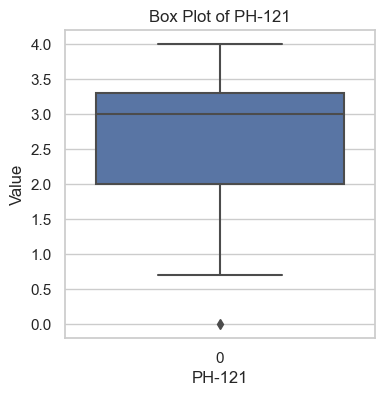

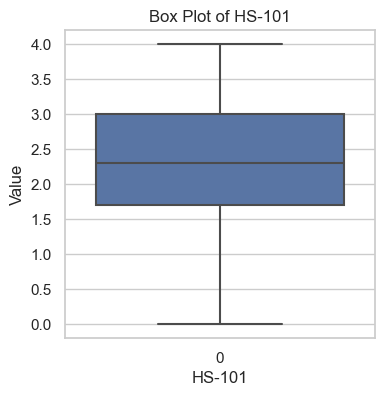

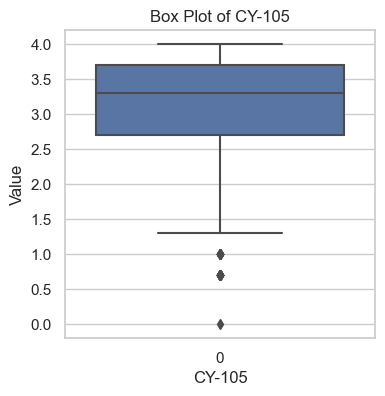

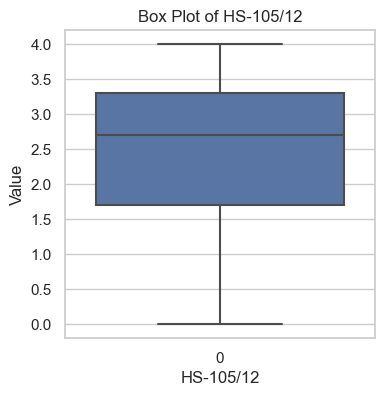

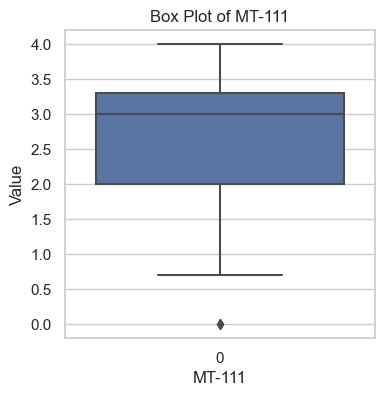

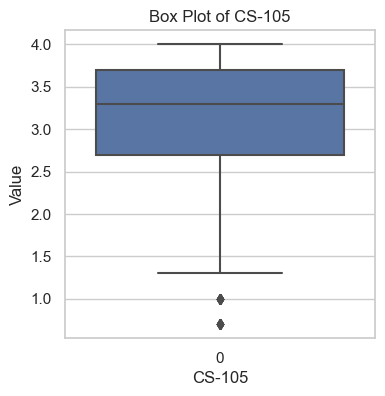

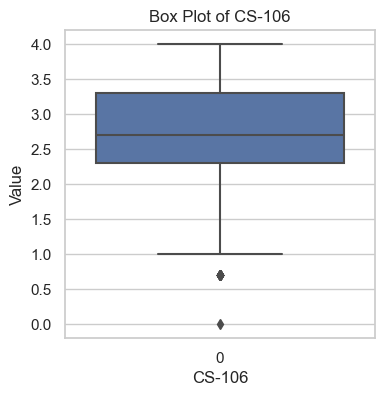

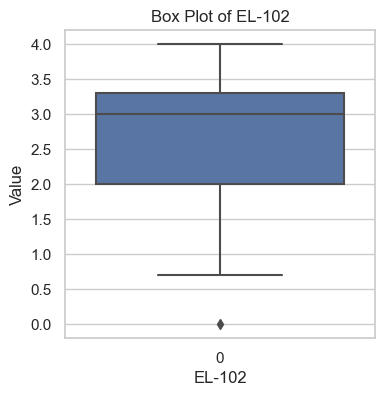

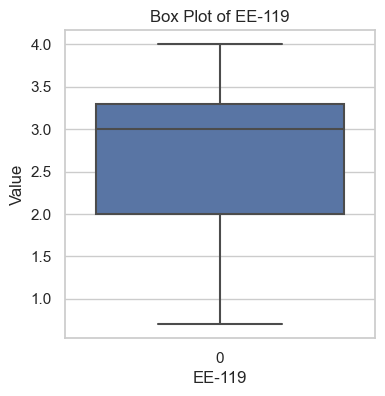

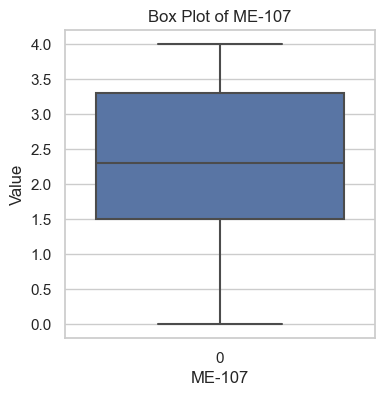

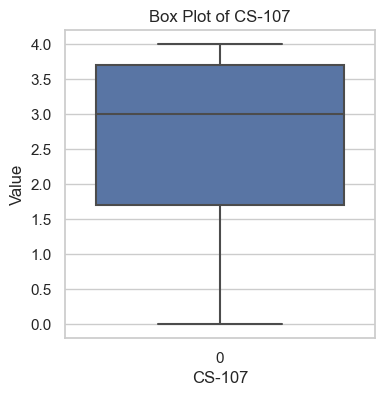

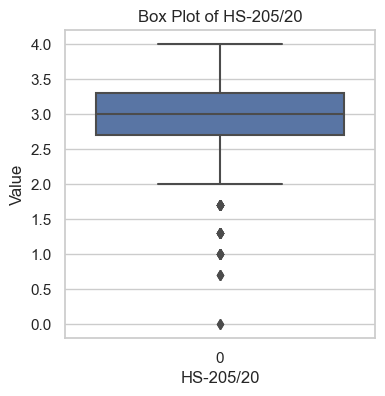

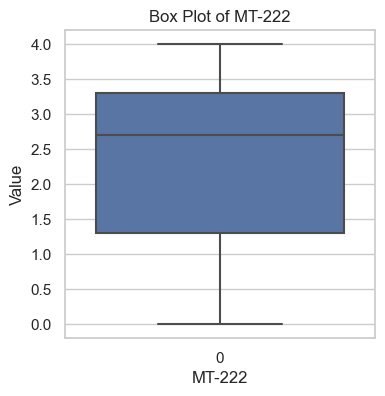

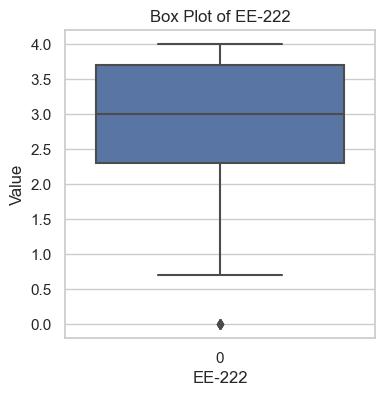

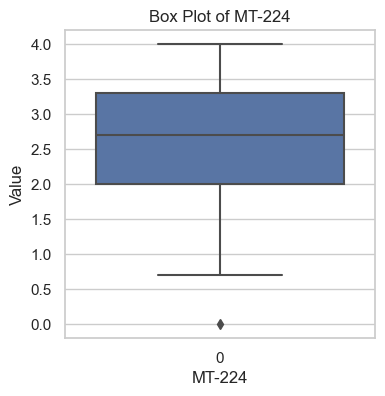

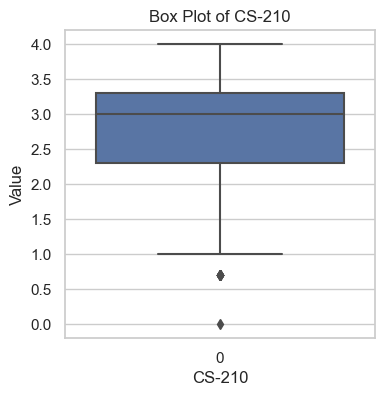

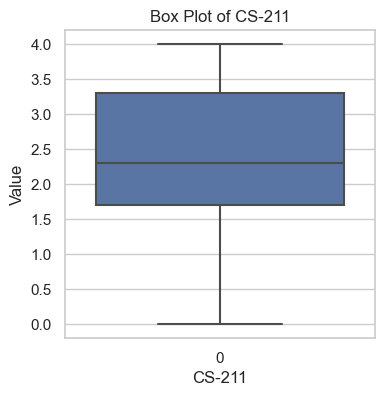

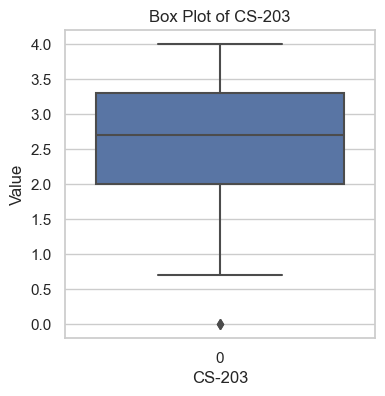

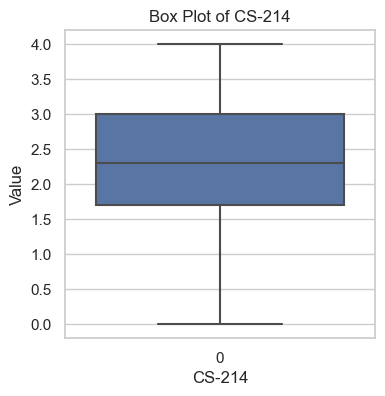

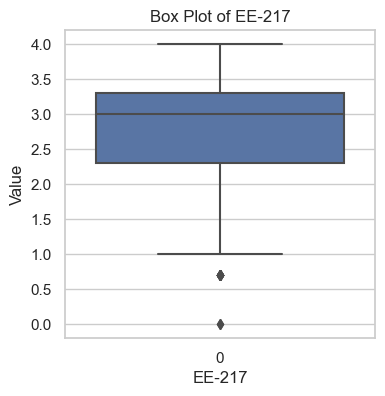

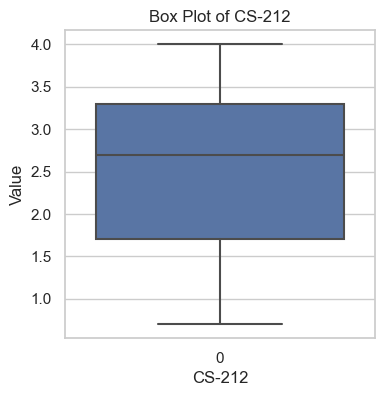

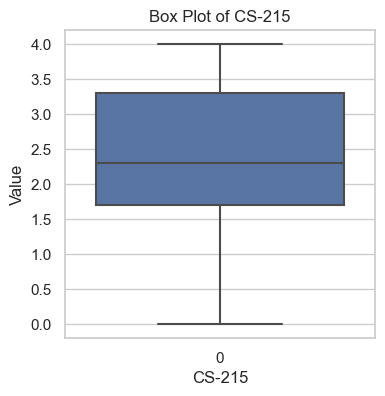

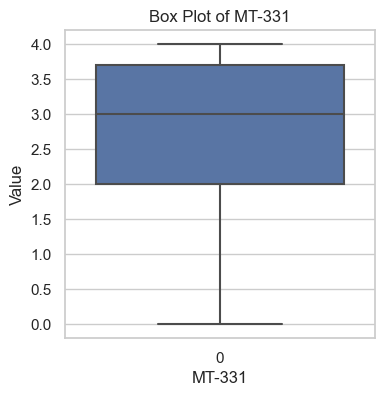

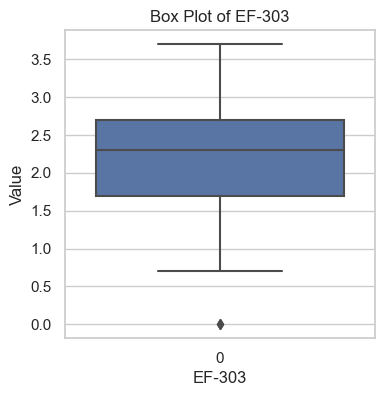

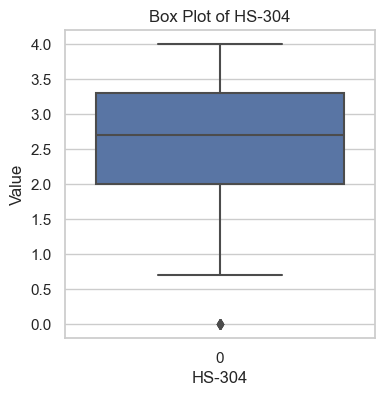

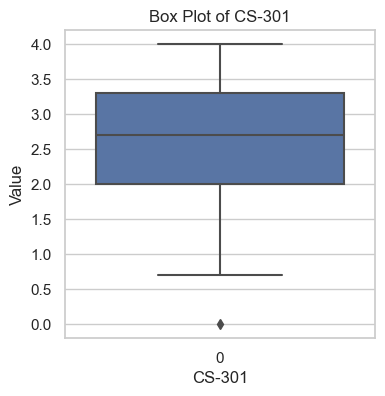

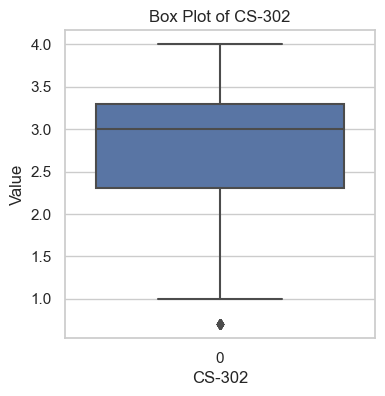

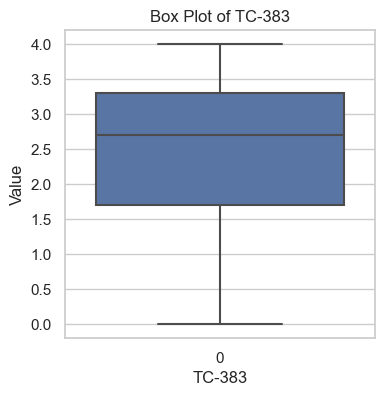

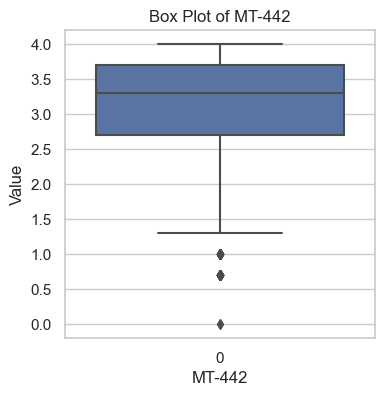

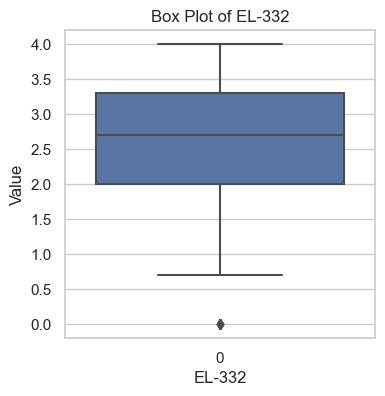

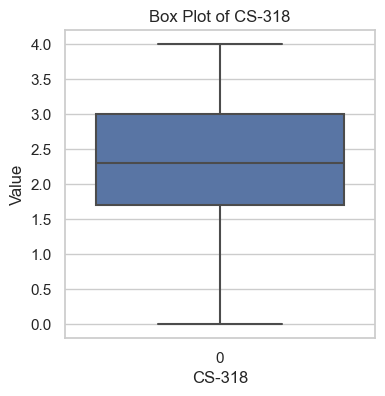

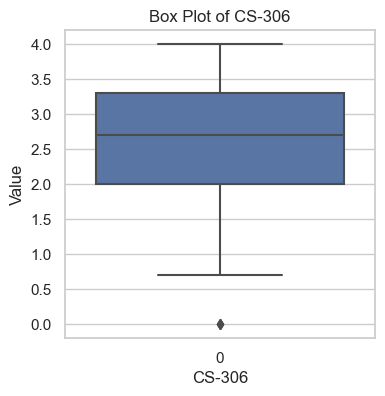

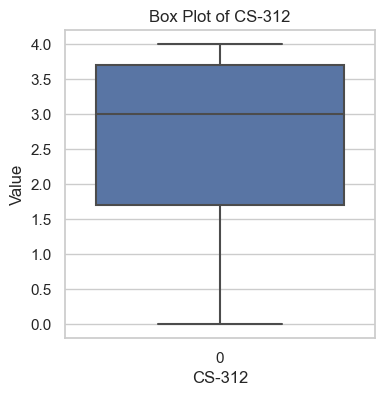

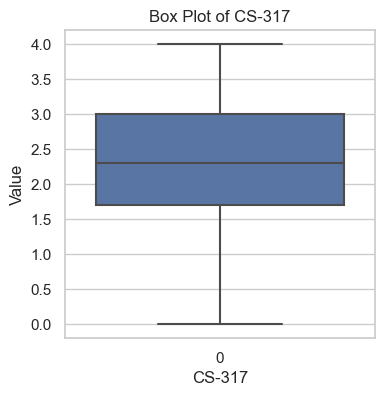

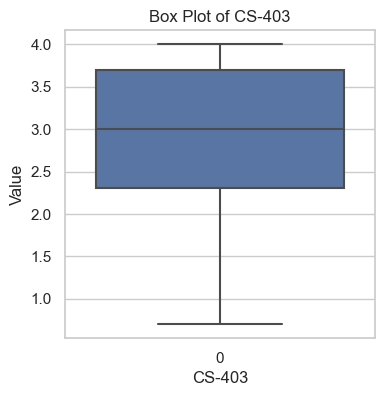

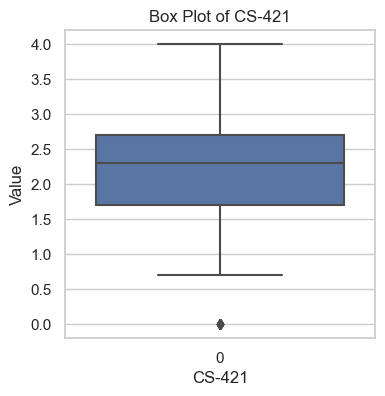

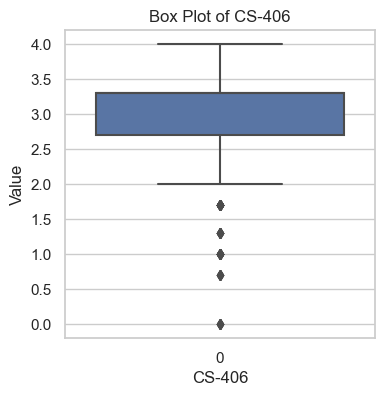

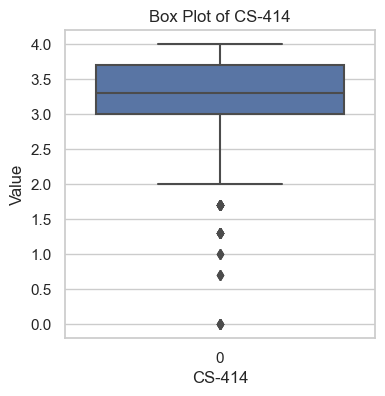

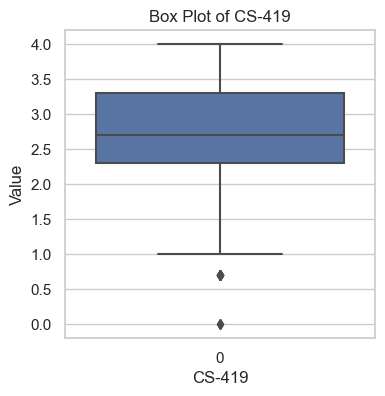

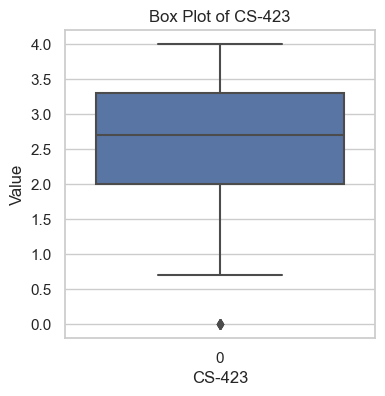

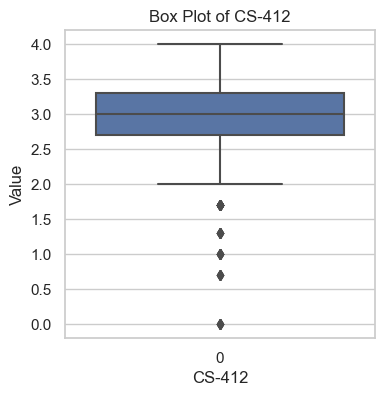

In [17]:
# Select columns for visualization (excluding Seat No. and CGPA)
columns_to_visualize = data.columns[1:-1]

sns.set(style="whitegrid")

# Iterate through each column and display the box plot
for column in columns_to_visualize:
    plt.figure(figsize=(4, 4))  # Adjust the figsize as needed
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()


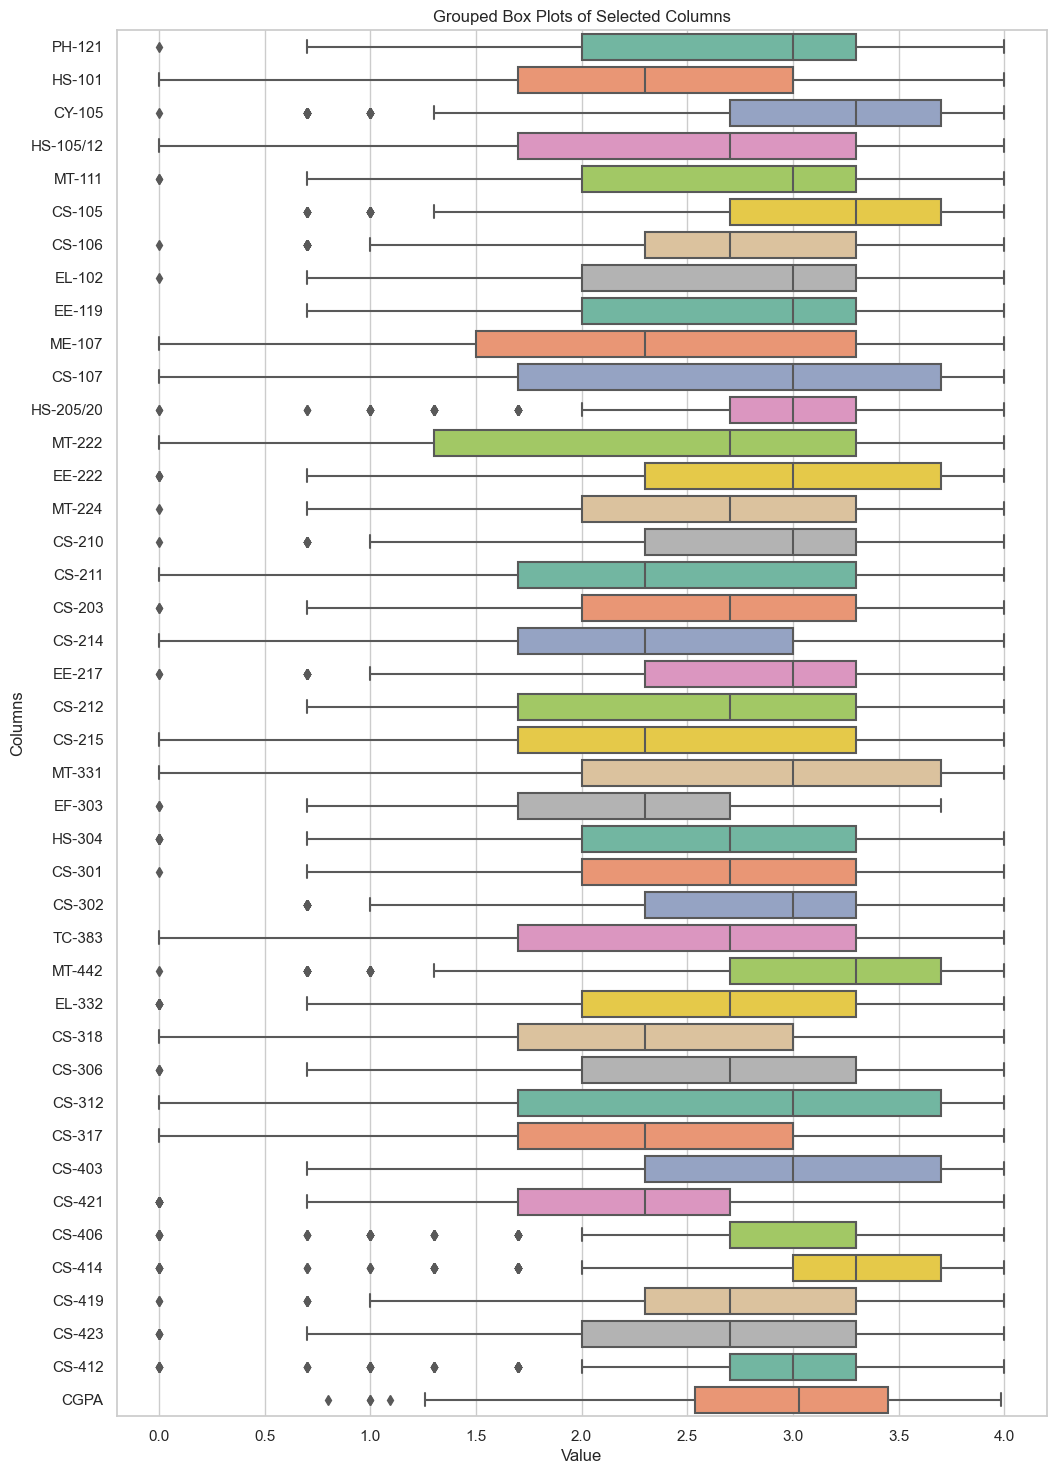

In [18]:
# Select columns for visualization (excluding Seat No. and CGPA)
columns_to_visualize = data.columns[1:]

# Set the style
sns.set(style="whitegrid")

# Create a grouped box plot for selected columns
plt.figure(figsize=(12, 18))  # Adjust the figsize as needed
sns.boxplot(data=data[columns_to_visualize], orient="h", palette="Set2")
plt.title('Grouped Box Plots of Selected Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()


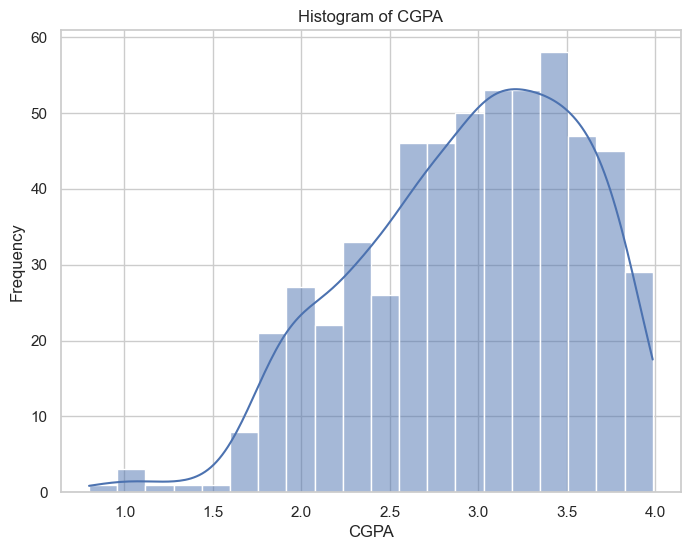

In [19]:
# Histogram Plot (histplot) for a single column, e.g., 'CGPA'
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='CGPA', bins=20, kde=True)  # Adjust 'x' and 'bins' as needed
plt.title('Histogram of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

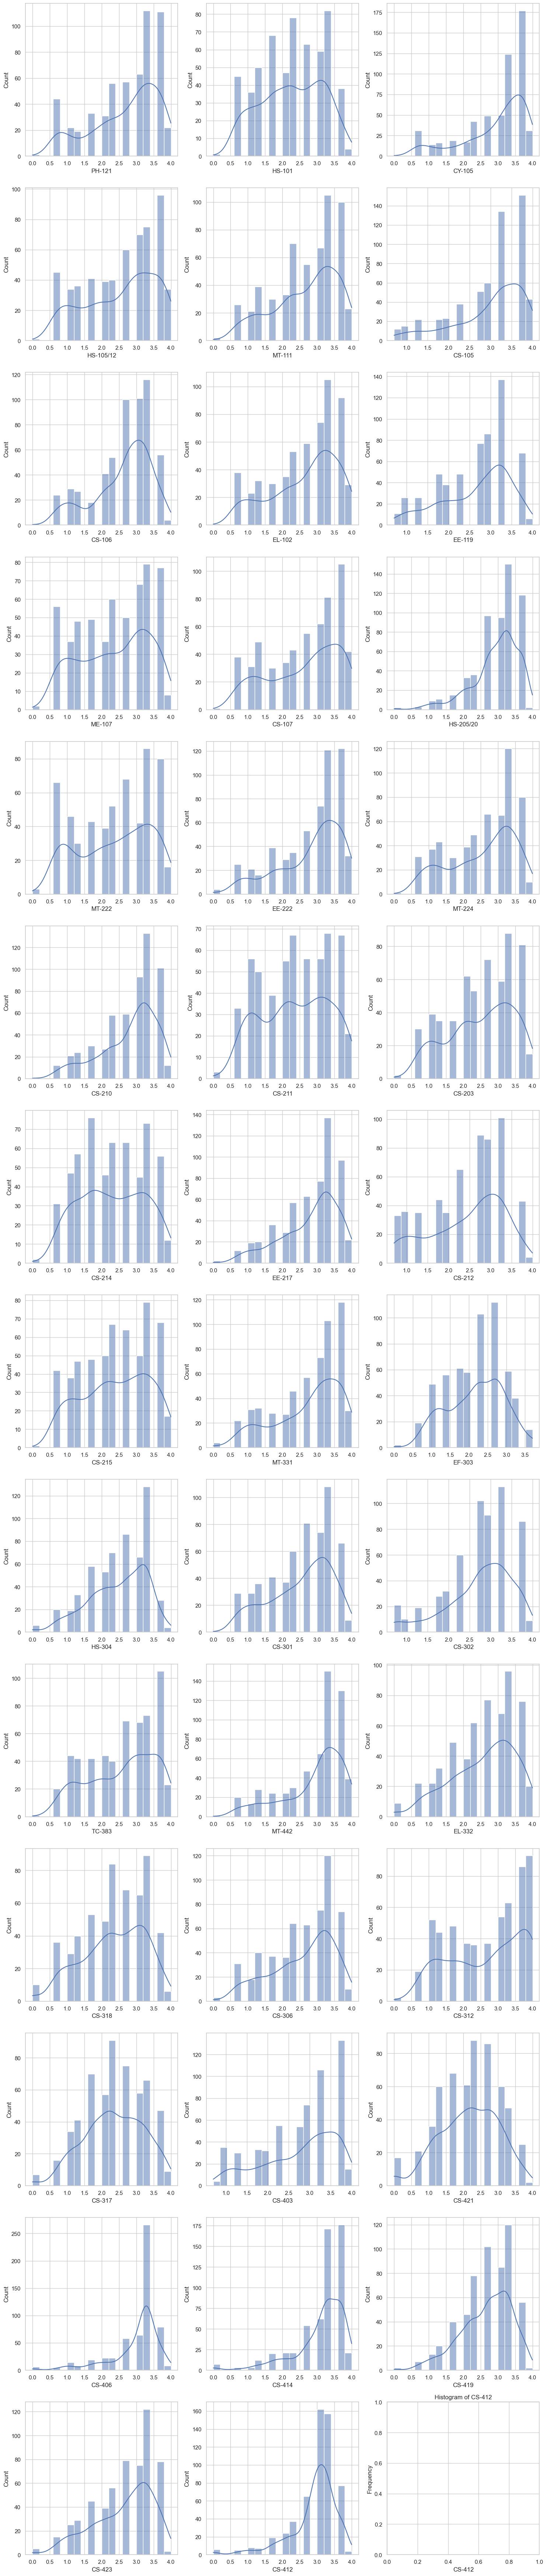

In [20]:
# Select columns for visualization (excluding Id number and Type of glass)
columns_to_visualize = data.columns[1:-1]

# Define the number of columns per row in the subplots
columns_per_row = 3

# Calculate the number of rows needed based on the number of numerical columns
num_rows = (len(columns_to_visualize) + columns_per_row - 1) // columns_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Plot histplots for each numerical column
for i, column in enumerate(columns_to_visualize):
    row = i // columns_per_row
    col = i % columns_per_row
    ax = axes[row, col]
    sns.histplot(data=data, x=column, bins=20, kde=True, ax=ax)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Remove the 'Seat No.' and 'CGPA' columns if you want to visualize the rest
columns_to_visualize = data.drop(['Seat No.', 'CGPA'], axis=1)

# Create a pairplot
sns.pairplot(columns_to_visualize)
plt.show()

In [ ]:
sns.pairplot(data.drop(['Seat No.'], axis=1), hue='CGPA', diag_kind='kde')
plt.show()


### Handling Outliers 

In [22]:
# Define a function to identify columns with outliers, excluding the target column
def find_columns_with_outliers(dataframe, target_column, threshold=1.5):
    outlier_columns = []
    
    # Calculate the IQR for each numerical column, excluding the target column
    for column in dataframe.select_dtypes(include=['number']).columns:
        if column != target_column:
            Q1 = dataframe[column].quantile(0.25)
            Q3 = dataframe[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Check for outliers and add the column to the list if outliers are present
            outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
            if not outliers.empty:
                outlier_columns.append(column)
    
    return outlier_columns

# Call the function on your DataFrame, excluding the "CGPA" column
target_column = "CGPA"
outlier_columns = find_columns_with_outliers(data, target_column)

# Print the columns with outliers
print("Columns with Outliers:")
print(outlier_columns)


Columns with Outliers:
['PH-121', 'CY-105', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'HS-205/20', 'EE-222', 'MT-224', 'CS-210', 'CS-203', 'EE-217', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'MT-442', 'EL-332', 'CS-306', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


In [23]:
# Create a copy of the original DataFrame
data_copy = data.copy()
data_copy
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

In [24]:
# Make a copy of the dataset
winsorized_data = data.copy()

# Define the percentage of data to be capped (e.g., 5% on each end)
winsor_percent = 0.1

# Apply winsorization to each column except 'Id number' and 'Type of glass'
columns_to_winsorize = data.columns[1:-1]
for column in columns_to_winsorize:
    winsorized_data[column] = winsorize(winsorized_data[column], limits=(winsor_percent, winsor_percent))

print(winsorized_data.shape)
    
# Now the dataset 'data_copy' has Winsorized values while preserving the original data

(571, 43)


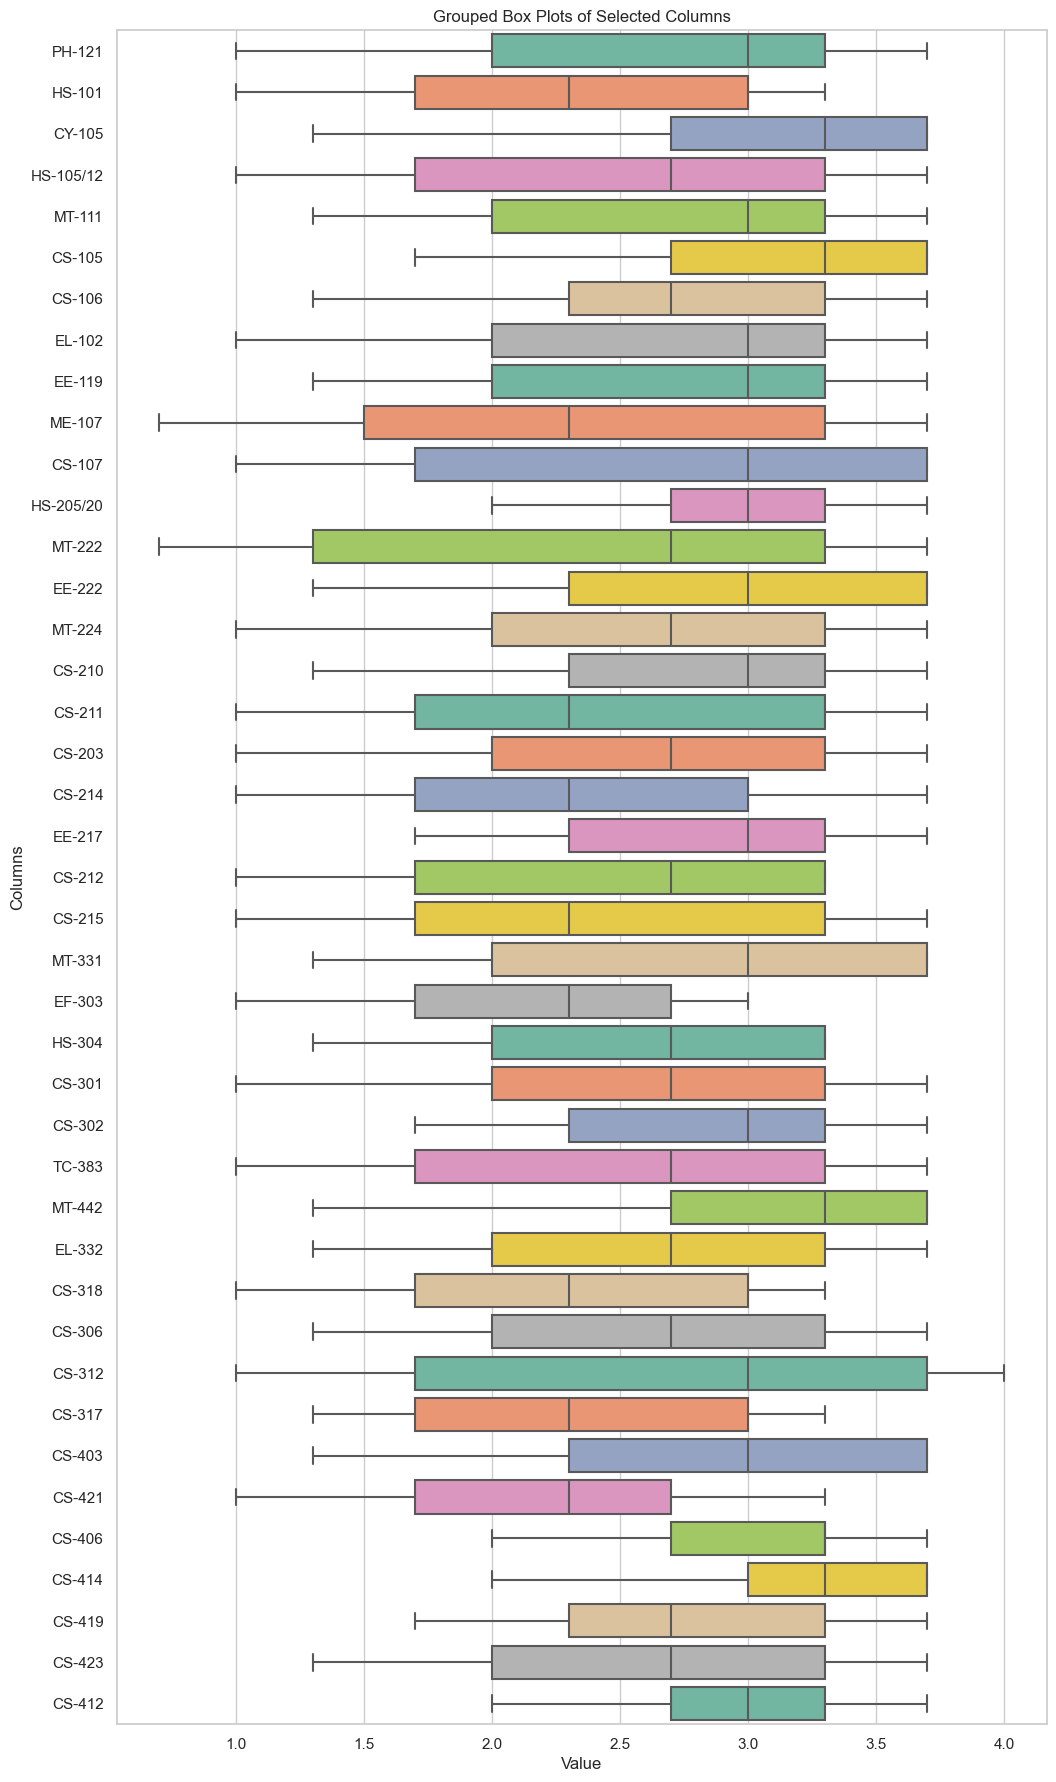

In [25]:
# Select columns for visualization (excluding Seat No. and CGPA)
columns_to_visualize = winsorized_data.columns[1:-1]

# Set the style
sns.set(style="whitegrid")

# Create a grouped box plot for selected columns
plt.figure(figsize=(12, 22))  # Adjust the figsize as needed
sns.boxplot(data=winsorized_data[columns_to_visualize], orient="h", palette="Set2")
plt.title('Grouped Box Plots of Selected Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()


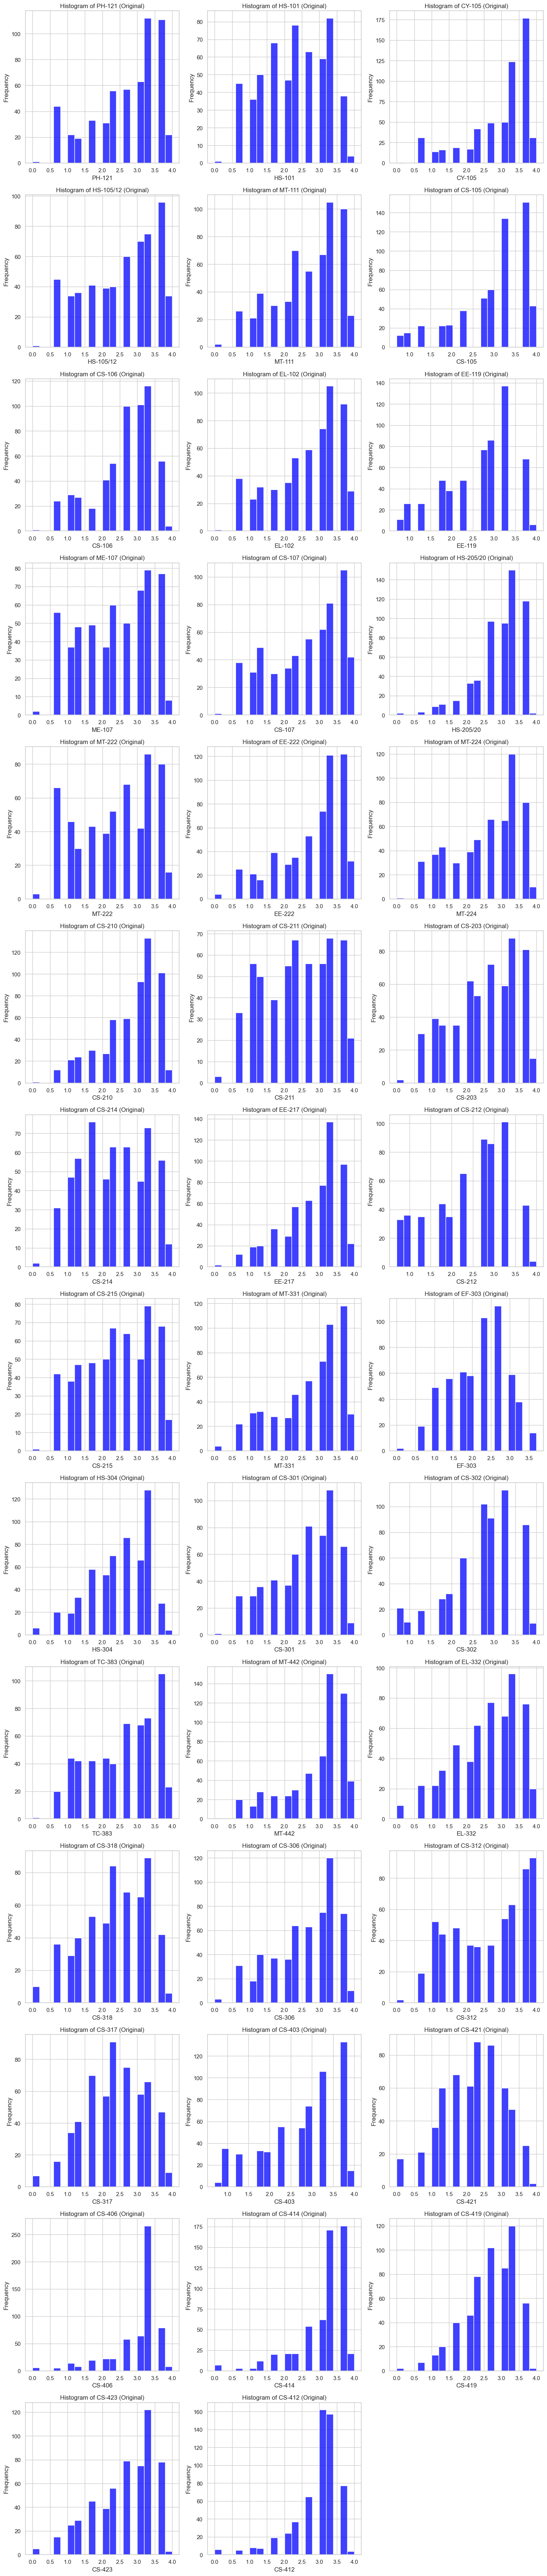

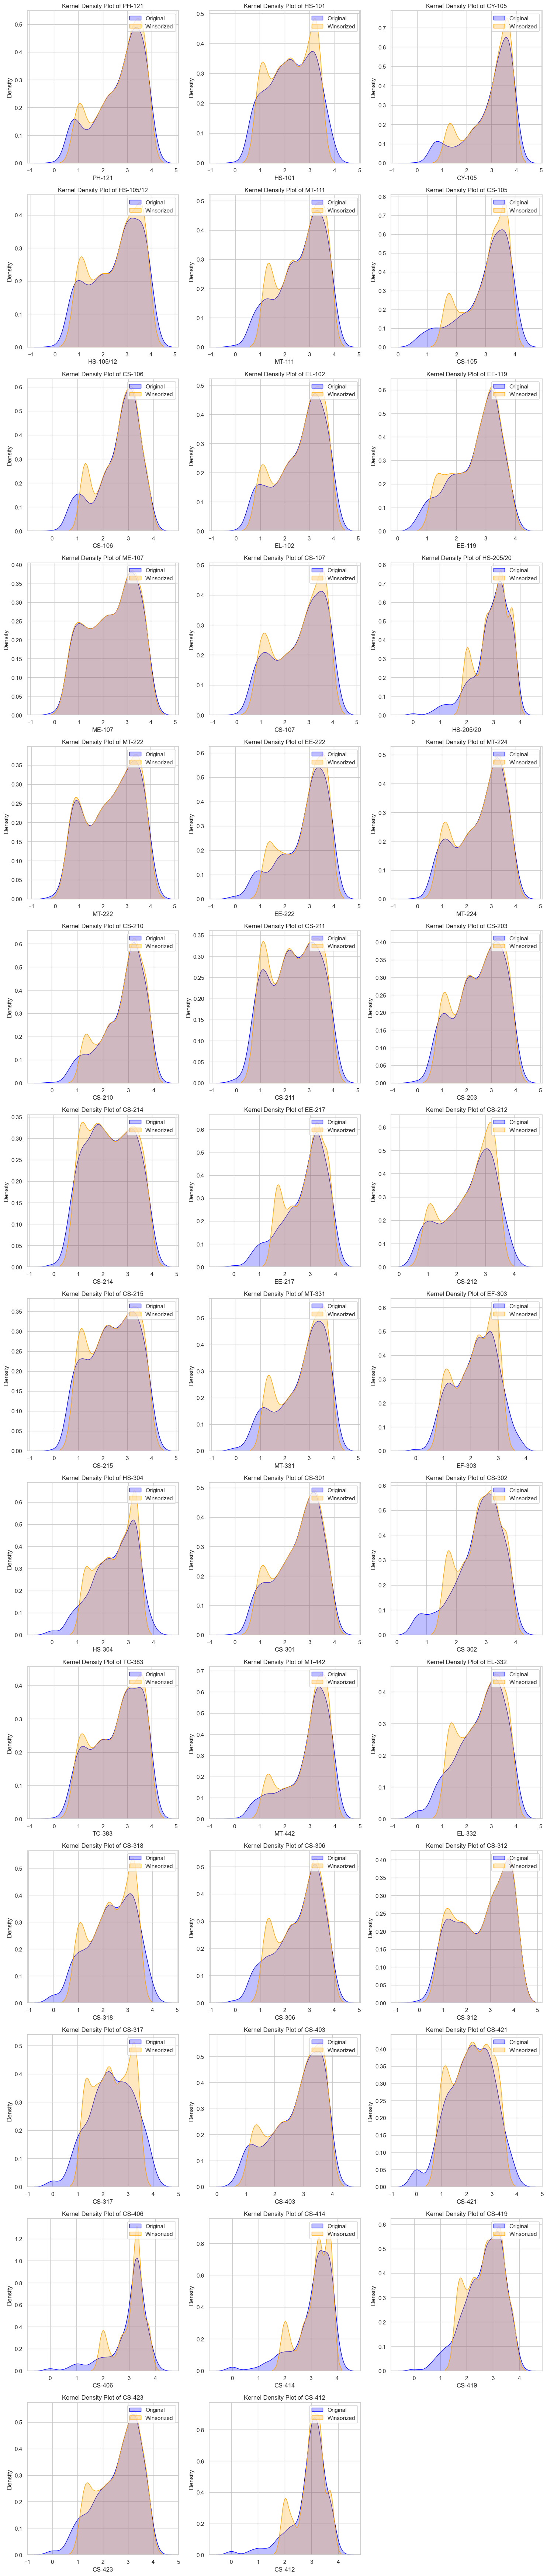

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original data histograms
num_columns = len(data.columns[1:-1])
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed
plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of columns
for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data[column], bins=20, kde=False, color='blue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} (Original)')
plt.tight_layout()
plt.show()

# Kernel Density Plots
plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of columns
for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(num_rows, 3, i)
    sns.kdeplot(data[column], color='blue', label='Original', shade=True)
    sns.kdeplot(winsorized_data[column], color='orange', label='Winsorized', shade=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'Kernel Density Plot of {column}')
plt.tight_layout()
plt.show()


# Feature Selection / Engineering

### Correlation Matrix (Triangle Heat Map) 

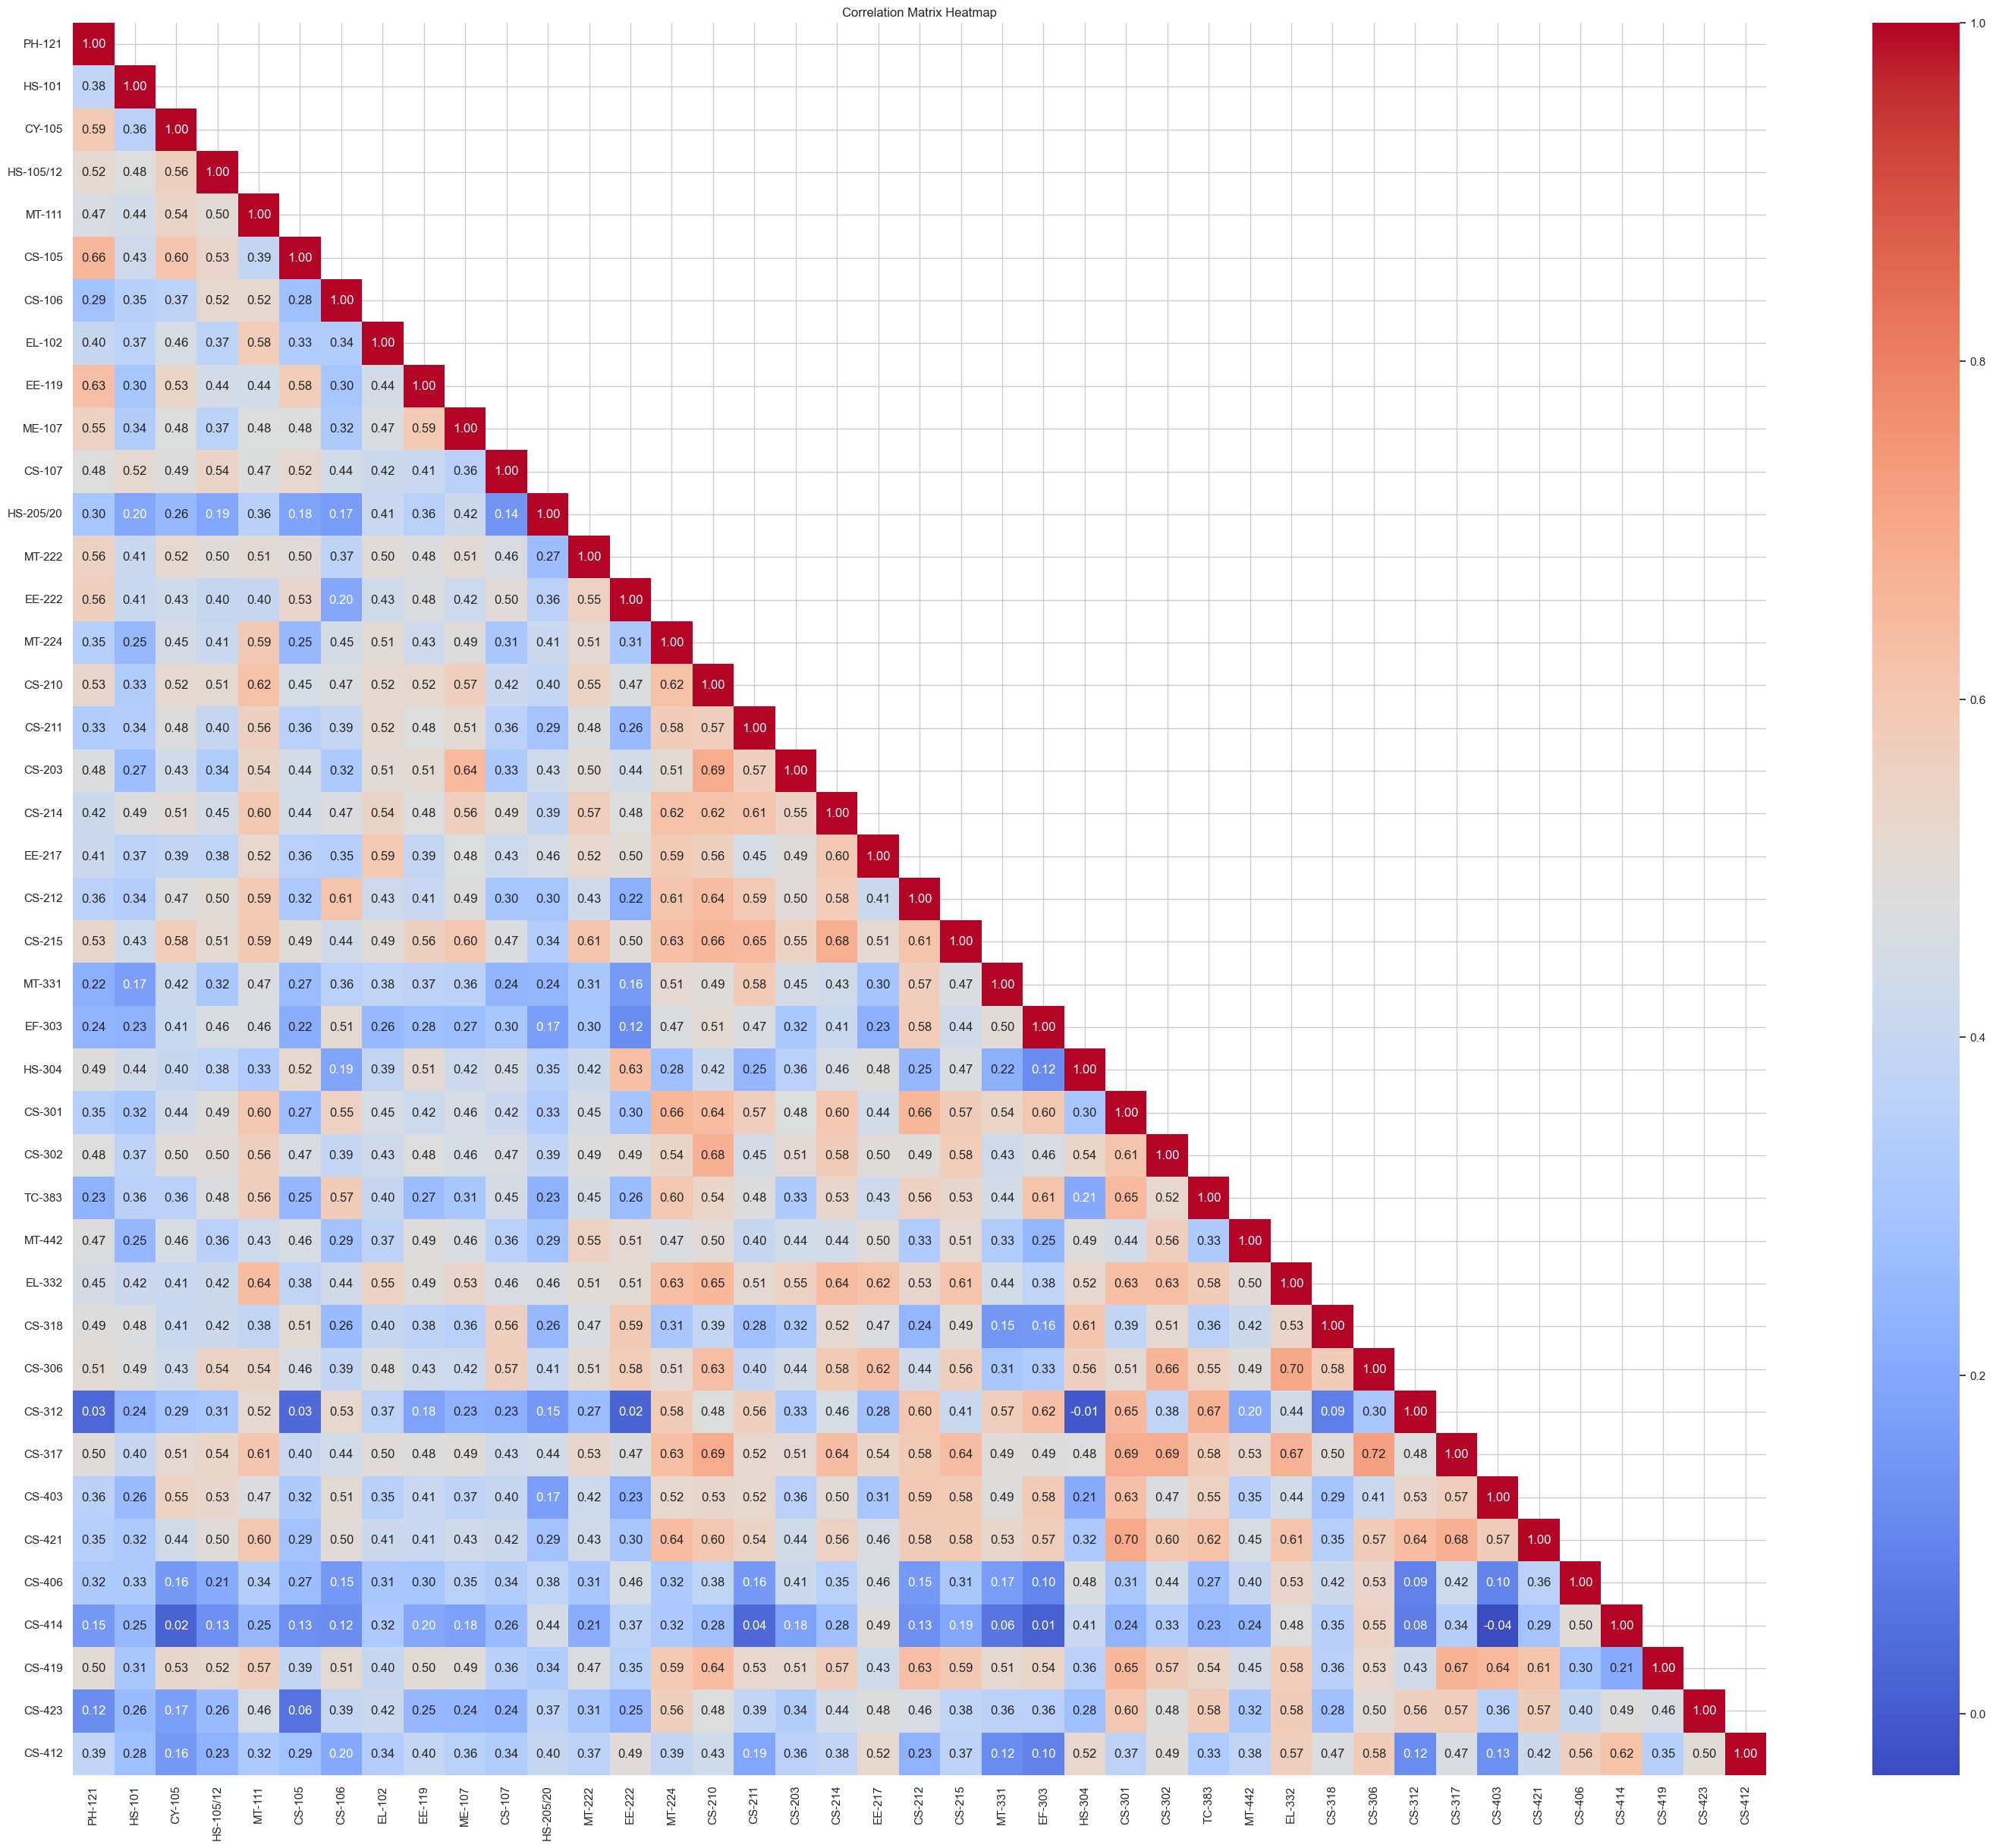

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.377337  0.589782   0.517513  0.465294  0.656383   
HS-101     0.377337  1.000000  0.358064   0.479443  0.439505  0.428538   
CY-105     0.589782  0.358064  1.000000   0.561227  0.539356  0.604210   
HS-105/12  0.517513  0.479443  0.561227   1.000000  0.504612  0.533269   
MT-111     0.465294  0.439505  0.539356   0.504612  1.000000  0.390094   
CS-105     0.656383  0.428538  0.604210   0.533269  0.390094  1.000000   
CS-106     0.286586  0.348952  0.370489   0.518569  0.518637  0.279069   
EL-102     0.402800  0.365260  0.456014   0.367548  0.575084  0.331905   
EE-119     0.634479  0.300962  0.534932   0.441589  0.439823  0.576509   
ME-107     0.550826  0.339324  0.478136   0.366642  0.480183  0.480362   
CS-107     0.479529  0.518323  0.487621   0.543669  0.474194  0.524893   
HS-205/20  0.300471  0.196608  0.257938   0.193199  0.358209  0.183968   
MT-222     0.557832  0.409287  0.519631   0.495951  0.508469  0.498892   
EE-222     0.564111  0.411754  0.431170   0.399946  0.399713  0.532127   
MT-224     0.345412  0.253081  0.447211   0.411472  0.592393  0.253021   
CS-210     0.527430  0.332614  0.518255   0.512867  0.621680  0.454159   
CS-211     0.333238  0.343479  0.482321   0.398955  0.559797  0.356118   
CS-203     0.475974  0.273813  0.434705   0.337844  0.539581  0.443311   
CS-214     0.420224  0.485923  0.505929   0.452354  0.598527  0.444626   
EE-217     0.413293  0.366963  0.390689   0.377934  0.524577  0.358619   
CS-212     0.362357  0.341111  0.474787   0.502210  0.590242  0.317434   
CS-215     0.528711  0.432206  0.576584   0.508203  0.592335  0.492699   
MT-331     0.222836  0.171485  0.415321   0.315697  0.469855  0.265206   
EF-303     0.236736  0.231582  0.411740   0.460471  0.464460  0.217003   
HS-304     0.486644  0.436718  0.404707   0.379498  0.328499  0.519904   
CS-301     0.345595  0.315489  0.435042   0.488898  0.598674  0.268424   
CS-302     0.481338  0.374996  0.497016   0.500497  0.564974  0.465619   
TC-383     0.233379  0.362824  0.363677   0.476696  0.563488  0.247794   
MT-442     0.474479  0.249293  0.457344   0.359313  0.428605  0.459105   
EL-332     0.451735  0.415587  0.405028   0.418144  0.638600  0.381118   
CS-318     0.488253  0.475741  0.410990   0.419553  0.381942  0.506355   
CS-306     0.508849  0.485588  0.433079   0.543665  0.541848  0.462927   
CS-312     0.028792  0.238769  0.294898   0.313325  0.518265  0.034509   
CS-317     0.497288  0.397763  0.512132   0.536759  0.606026  0.404981   
CS-403     0.363689  0.262418  0.549610   0.529874  0.472008  0.324315   
CS-421     0.346366  0.323053  0.435905   0.495277  0.596085  0.291638   
CS-406     0.321262  0.325765  0.155007   0.208972  0.342451  0.266751   
CS-414     0.153195  0.254039  0.019018   0.129997  0.248009  0.126132   
CS-419     0.502302  0.305954  0.528308   0.519252  0.569863  0.392033   
CS-423     0.123328  0.259884  0.171533   0.261072  0.456675  0.055922   
CS-412     0.387025  0.279640  0.157280   0.228118  0.322509  0.285871   

             CS-106    EL-102    EE-119    ME-107  ...    CS-306    CS-312  \
PH-121     0.286586  0.402800  0.634479  0.550826  ...  0.508849  0.028792   
HS-101     0.348952  0.365260  0.300962  0.339324  ...  0.485588  0.238769   
CY-105     0.370489  0.456014  0.534932  0.478136  ...  0.433079  0.294898   
HS-105/12  0.518569  0.367548  0.441589  0.366642  ...  0.543665  0.313325   
MT-111     0.518637  0.575084  0.439823  0.480183  ...  0.541848  0.518265   
CS-105     0.279069  0.331905  0.576509  0.480362  ...  0.462927  0.034509   
CS-106     1.000000  0.337683  0.301206  0.320834  ...  0.390203  0.525169   
EL-102     0.337683  1.000000  0.442338  0.466387  ...  0.477744  0.370873   
EE-119     0.301206  0.442338  1.000000  0.590571  ...  0.426524  0.178529   
ME-107     0.320834  0.466387  0.590571  1.000000  ...  0.424020  0.233321   
CS-107     0.439584  0.418617  0.407601  0.359

In [27]:
# Calculate correlation matrix
correlation_matrix = winsorized_data.drop(columns=['Seat No.', 'CGPA']).corr()

# Create a triangle heatmap
plt.figure(figsize=(36,30))
mask = np.triu(np.ones(correlation_matrix.shape), k=1)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_matrix

### Feature Engineering 

•	**Create grade vectors:** Generate a feature that combines the grades from different years to represent a student's four-year grade progression.

•	**Calculate averages:** Compute the average grade for each student over the four-year period to capture overall performance.


In [28]:
# Create grade vectors on winsorized data
winsorized_data['Grade_Vector'] = winsorized_data.iloc[:, 1:-1].apply(lambda row: row.values.tolist(), axis=1)

# Calculate average grade on winsorized data
winsorized_data['Average_Grade'] = winsorized_data.iloc[:, 1:-1].mean(axis=1)

# Print the updated DataFrame
winsorized_data.head()


Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001     2.3     1.0     1.3        1.7     1.3     1.7     1.3   
1  CS-97002     3.7     1.0     1.3        1.0     2.3     1.7     1.3   
2  CS-97003     3.7     2.7     3.7        2.3     3.0     3.7     2.3   
3  CS-97004     1.0     2.0     1.3        1.0     1.3     3.3     1.3   
4  CS-97005     3.3     3.3     3.3        3.0     3.7     3.7     3.3   

   EL-102  EE-119  ...  CS-403  CS-421  CS-406  CS-414  CS-419  CS-423  \
0     1.3     2.3  ...     1.3     1.3     3.3     3.7     1.7     2.7   
1     3.7     1.3  ...     1.7     1.0     3.3     2.3     1.7     1.7   
2     3.0     3.3  ...     3.7     1.7     3.7     3.7     3.7     3.3   
3     1.3     1.3  ...     1.3     1.3     2.3     2.7     2.0     2.0   
4     3.0     3.7  ...     3.0     2.3     3.3     3.7     3.3     3.3   

   CS-412   CGPA                                       Grade_Vector  \
0     3.3  2.205  [2.3, 1.0, 1.3, 1.7, 1.3, 1.7, 1.3, 1.3, 2.3, ...   
1     2.7  2.008  [3.7, 1.0, 1.3, 1.0, 2.3, 1.7, 1.3, 3.7, 1.3, ...   
2     3.7  3.608  [3.7, 2.7, 3.7, 2.3, 3.0, 3.7, 2.3, 3.0, 3.3, ...   
3     2.0  1.906  [1.0, 2.0, 1.3, 1.0, 1.3, 3.3, 1.3, 1.3, 1.3, ...   
4     3.7  3.448  [3.3, 3.3, 3.3, 3.0, 3.7, 3.7, 3.3, 3.0, 3.7, ...   

   Average_Grade  
0       1.864405  
1       1.757333  
2       3.252571  
3       1.647762  
4       3.094000  

[5 rows x 45 columns]

### Feature Selection

* Calculate feature importance scores using a tree-based model (e.g., Random Forest) and rank the features.
* Check the correlation between the top-ranked features and CGPA.


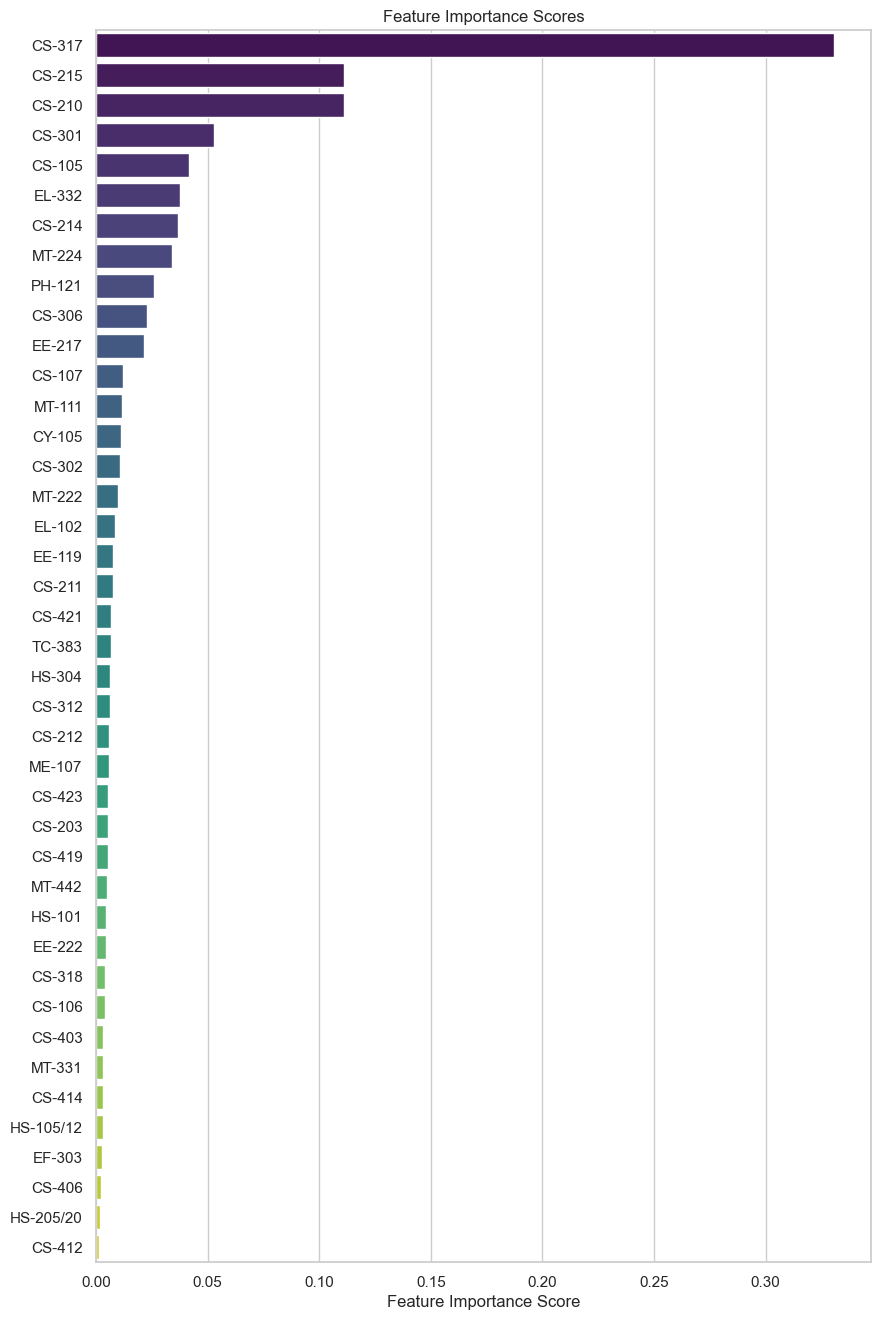

CS-317       0.330729
CS-215       0.111172
CS-210       0.111114
CS-301       0.052740
CS-105       0.041765
EL-332       0.037709
CS-214       0.036502
MT-224       0.034031
PH-121       0.025995
CS-306       0.022654
EE-217       0.021388
CS-107       0.011972
MT-111       0.011596
CY-105       0.011052
CS-302       0.010876
MT-222       0.009642
EL-102       0.008609
EE-119       0.007625
CS-211       0.007427
CS-421       0.006616
TC-383       0.006603
HS-304       0.006449
CS-312       0.006200
CS-212       0.005704
ME-107       0.005618
CS-423       0.005403
CS-203       0.005298
CS-419       0.005294
MT-442       0.004975
HS-101       0.004606
EE-222       0.004545
CS-318       0.004008
CS-106       0.003904
CS-403       0.003158
MT-331       0.003125
CS-414       0.003006
HS-105/12    0.002964
EF-303       0.002831
CS-406       0.002091
HS-205/20    0.001671
CS-412       0.001331
dtype: float64

In [29]:
# Specify the target variable
target_column = "CGPA"

# Extract features (exclude 'Seat No.', 'CGPA', and any other non-grade columns)
# Adjust the column selection as needed based on your dataset
features = winsorized_data.drop(columns=['Seat No.', 'CGPA', 'Grade_Vector', 'Average_Grade'])

# Define the target variable
target = winsorized_data[target_column]

# Calculate feature importance scores using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, target)
feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 16))
sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h', palette='viridis')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance Scores')
plt.show()

feature_importances


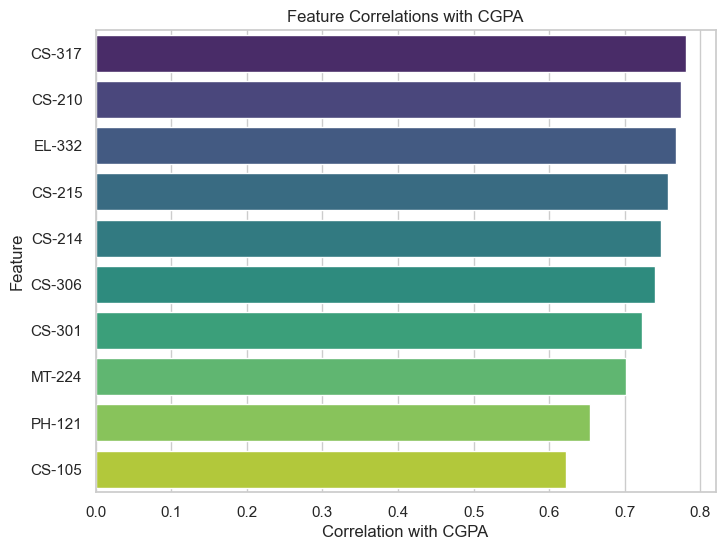

Top-10 Selected Features:
['CS-317', 'CS-215', 'CS-210', 'CS-301', 'CS-105', 'EL-332', 'CS-214', 'MT-224', 'PH-121', 'CS-306']


In [261]:
# Select the top-k important features (adjust k as needed)
k = 10
top_k_features = feature_importances.head(k)

# Check feature correlations with the target variable
correlations = winsorized_data[top_k_features.index].corrwith(winsorized_data[target_column])
correlation_df = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Visualize feature correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_df['Correlation'], y=correlation_df['Feature'], orient='h', palette='viridis')
plt.xlabel('Correlation with CGPA')
plt.title('Feature Correlations with CGPA')
plt.show()

# Print the top-k selected features
print("Top-{} Selected Features:".format(k))
print(top_k_features.index.tolist())

### Feature Selection using Recursive Feature Elimination (RFE) and Principal Component Analysis (PCA)

In [30]:
# Extract features (exclude 'Seat No.', 'CGPA', and any other non-grade columns)
# Adjust the column selection as needed based on your dataset
features = winsorized_data.drop(columns=['Seat No.', 'CGPA', 'Grade_Vector', 'Average_Grade'])

# Define the target variable
target = winsorized_data[target_column]

# Specify the number of features to select (e.g., 10)
num_features_to_select = 10

# Create an RFE model
rfe = RFE(estimator=LinearRegression(), n_features_to_select=num_features_to_select)

# Fit the RFE model to your data
selected_features = rfe.fit_transform(features, target)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Extract the selected features from your dataset
selected_features_df = features.loc[:, selected_feature_indices]

selected_features_df

# Get the column names of the selected features
selected_feature_names = selected_features_df.columns.tolist()

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
['HS-101', 'CY-105', 'CS-105', 'EE-119', 'CS-203', 'EE-217', 'CS-301', 'EL-332', 'CS-317', 'CS-421']


In [31]:

# Specify the target variable
target_column = "CGPA"

# Extract features (exclude 'Seat No.', 'CGPA', and any other non-grade columns)
# Adjust the column selection as needed based on your dataset
features = winsorized_data.drop(columns=['Seat No.', 'CGPA', 'Grade_Vector', 'Average_Grade'])

# Define the target variable
target = winsorized_data[target_column]

# Specify the number of components to retain (e.g., 10)
num_components_to_retain = 10

# Create a PCA model
pca = PCA(n_components=num_components_to_retain)

# Fit and transform your data using PCA
reduced_features = pca.fit_transform(features)

# Create a DataFrame from the reduced features
reduced_features_df = pd.DataFrame(data=reduced_features, columns=[f'PC{i+1}' for i in range(num_components_to_retain)])

reduced_features_df

# Get the column names of the selected features
selected_feature_names = reduced_features_df.columns.tolist()

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


# Feature Importance 

In [32]:
# Make a copy of the winsorized dataset
winsorized_data2 = winsorized_data.copy()
winsorized_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seat No.       571 non-null    object 
 1   PH-121         571 non-null    float64
 2   HS-101         571 non-null    float64
 3   CY-105         571 non-null    float64
 4   HS-105/12      571 non-null    float64
 5   MT-111         571 non-null    float64
 6   CS-105         571 non-null    float64
 7   CS-106         571 non-null    float64
 8   EL-102         571 non-null    float64
 9   EE-119         571 non-null    float64
 10  ME-107         571 non-null    float64
 11  CS-107         571 non-null    float64
 12  HS-205/20      571 non-null    float64
 13  MT-222         571 non-null    float64
 14  EE-222         571 non-null    float64
 15  MT-224         571 non-null    float64
 16  CS-210         571 non-null    float64
 17  CS-211         571 non-null    float64
 18  CS-203    

In [33]:
# Define X and y
X = winsorized_data2.drop(['Seat No.','CGPA', 'Grade_Vector', 'Average_Grade'], axis=1)
y = winsorized_data2['CGPA']

In [34]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


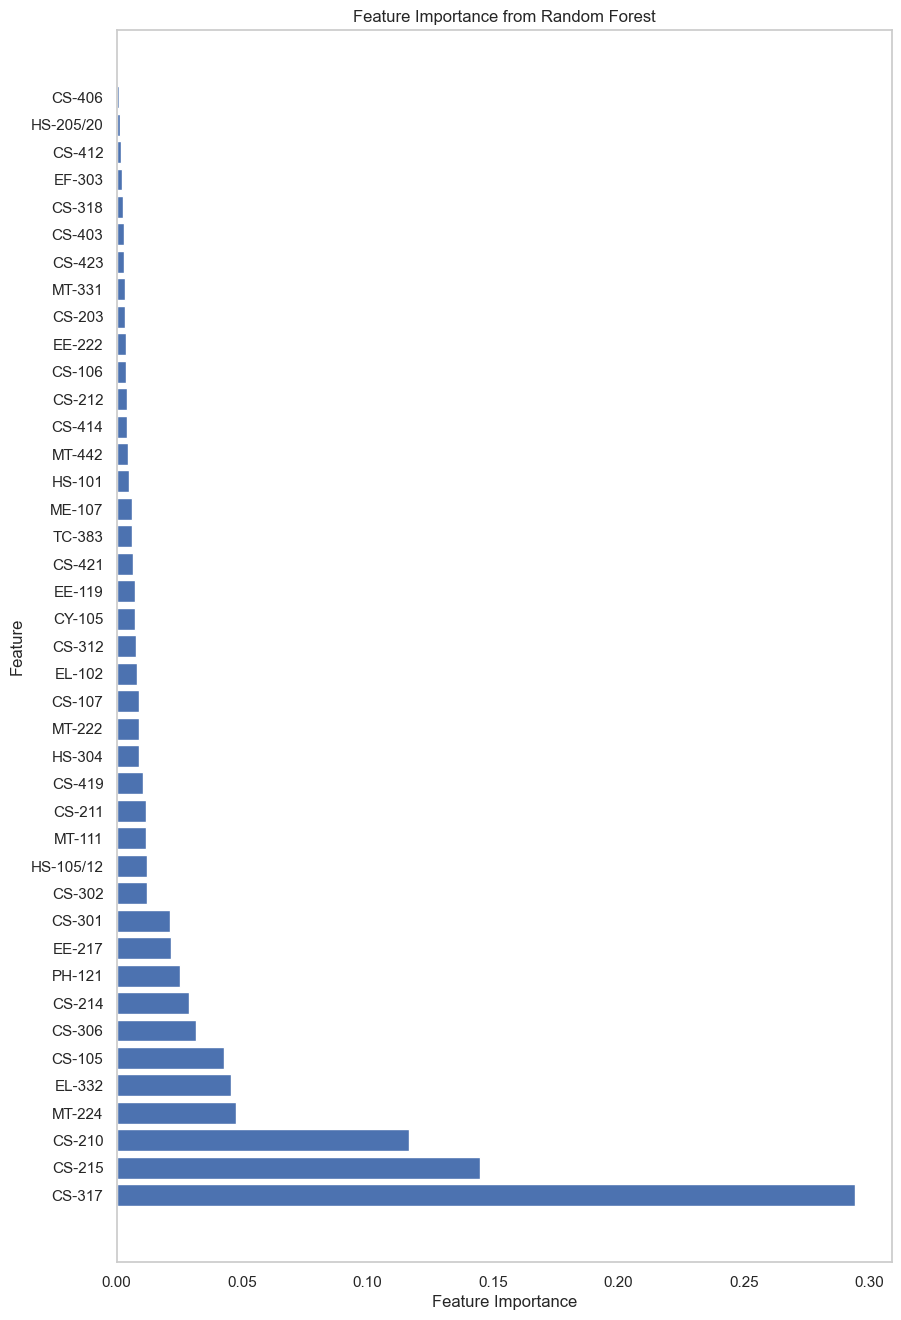

importance_df using Tree Model


Feature  Importance
33     CS-317    0.294029
21     CS-215    0.144704
15     CS-210    0.116349
14     MT-224    0.047750
29     EL-332    0.045371
5      CS-105    0.042694
31     CS-306    0.031687
18     CS-214    0.028646
0      PH-121    0.025226
19     EE-217    0.021505
25     CS-301    0.021431
26     CS-302    0.012027
3   HS-105/12    0.011902
4      MT-111    0.011901
16     CS-211    0.011546
38     CS-419    0.010564
24     HS-304    0.008889
12     MT-222    0.008866
10     CS-107    0.008740
7      EL-102    0.008311
32     CS-312    0.007850
2      CY-105    0.007514
8      EE-119    0.007178
35     CS-421    0.006486
27     TC-383    0.006142
9      ME-107    0.006064
1      HS-101    0.004856
28     MT-442    0.004589
37     CS-414    0.004328
20     CS-212    0.004073
6      CS-106    0.003685
13     EE-222    0.003582
17     CS-203    0.003485
22     MT-331    0.003199
39     CS-423    0.003110
34     CS-403    0.003087
30     CS-318    0.002680
23     EF-303    0.002172
40     CS-412    0.001576
11  HS-205/20    0.001196
36     CS-406    0.001013

In [35]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 16))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.grid(False)  # Remove the grid
plt.show()

# Display the sorted importance DataFrame
print("importance_df using Tree Model")
importance_df

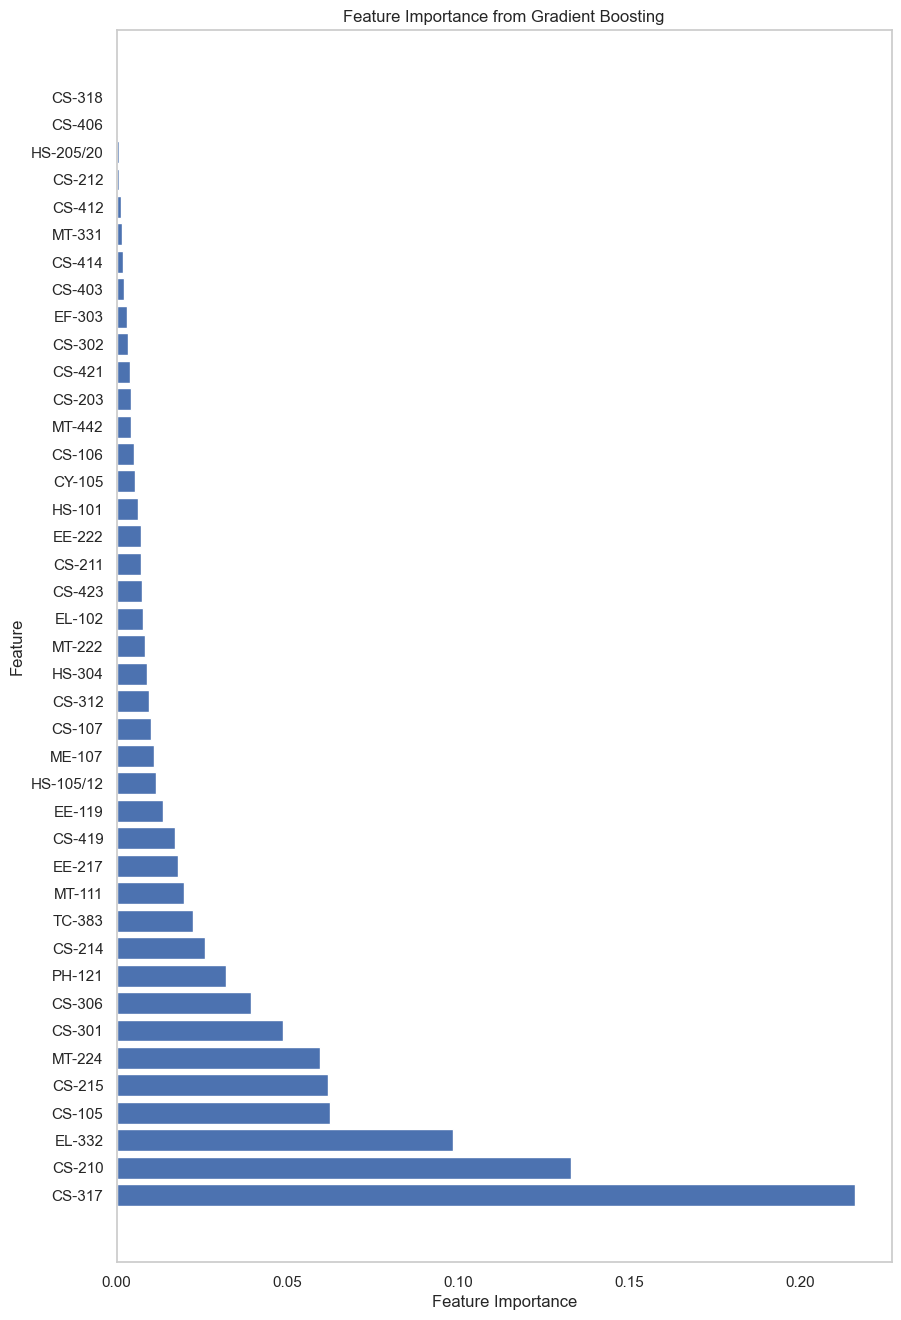

importance_df Gradient Boost


Feature  Importance
33     CS-317    0.215900
15     CS-210    0.132782
29     EL-332    0.098451
5      CS-105    0.062315
21     CS-215    0.061801
14     MT-224    0.059362
25     CS-301    0.048796
31     CS-306    0.039418
0      PH-121    0.032134
18     CS-214    0.025940
27     TC-383    0.022315
4      MT-111    0.019639
19     EE-217    0.018051
38     CS-419    0.017083
8      EE-119    0.013531
3   HS-105/12    0.011599
9      ME-107    0.010835
10     CS-107    0.009956
32     CS-312    0.009465
24     HS-304    0.008752
12     MT-222    0.008205
7      EL-102    0.007764
39     CS-423    0.007531
16     CS-211    0.007156
13     EE-222    0.007137
1      HS-101    0.006231
2      CY-105    0.005399
6      CS-106    0.005096
28     MT-442    0.004340
17     CS-203    0.004166
35     CS-421    0.003874
26     CS-302    0.003198
23     EF-303    0.002907
34     CS-403    0.002070
37     CS-414    0.001940
22     MT-331    0.001651
40     CS-412    0.001169
20     CS-212    0.000824
11  HS-205/20    0.000750
36     CS-406    0.000459
30     CS-318    0.000008

In [273]:
# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 16))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting')
plt.grid(False)  # Remove the grid
plt.show()

# Display the sorted importance DataFrame
print("importance_df Gradient Boost")
importance_df

In [36]:
# Initialize the SelectKBest feature selector
num_features_to_select = 23  # Choose a suitable number of features
feature_selector = SelectKBest(score_func=f_regression, k=num_features_to_select)

# Fit feature selector on training data
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Transform test data using feature selector
X_test_selected = feature_selector.transform(X_test)

# Display selected feature names
selected_feature_names = X_train.columns[feature_selector.get_support()]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['PH-121', 'CY-105', 'HS-105/12', 'MT-111', 'EE-119', 'ME-107', 'MT-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'CS-301', 'CS-302', 'TC-383', 'EL-332', 'CS-306', 'CS-317',
       'CS-421', 'CS-419'],
      dtype='object')


# Model Building, Evaluation and Comparison

In [39]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Initialize evaluation metrics
metrics = {
    "Mean Squared Error": mean_squared_error,
    "Mean Absolute Error": mean_absolute_error,
    "R-squared": r2_score,
    "Explained Variance": explained_variance_score,
    "Max Error": max_error
}

results = []

for model_name, model in models.items():
    model_results = {"Model": model_name}
    
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        model_results[metric_name] = metric_value
    
    results.append(model_results)

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the results
results_df

Model  Mean Squared Error  Mean Absolute Error  \
0          Linear Regression            0.011390             0.073202   
1              Random Forest            0.017547             0.092257   
2          Gradient Boosting            0.019390             0.102107   
3  Support Vector Regression            0.016768             0.090267   

   R-squared  Explained Variance  Max Error  
0   0.965773            0.966989   0.477467  
1   0.947273            0.949225   0.687805  
2   0.941735            0.943565   0.595592  
3   0.949613            0.949615   0.712930

with k = 10
1. **Linear Regression:** This model has the lowest Mean Squared Error (MSE), Mean Absolute Error (MAE), and Max Error, indicating the smallest prediction errors among the models. It also has a high R-squared value (0.915), suggesting a good fit to the data.

2. **Random Forest:** While Random Forest has slightly higher MSE and MAE compared to Linear Regression, it still performs reasonably well. The R-squared value (0.875) indicates that it explains a substantial portion of the variance in CGPA.

3. **Gradient Boosting:** Gradient Boosting falls between Linear Regression and Random Forest in terms of MSE and MAE. It has a higher R-squared value (0.885) than Random Forest, indicating a slightly better fit to the data.

4. **Support Vector Regression (SVR):** SVR has competitive results, with a relatively low MSE and MAE. It also has a high R-squared value (0.898), indicating a good fit.

Overall, linear Regression appears to perform well in terms of accuracy and simplicity.

with k=41

**Linear Regression:** This model has the lowest Mean Squared Error (MSE), Mean Absolute Error (MAE), and Max Error, indicating the smallest prediction errors among the models. It also has the highest R-squared value (0.972), suggesting an excellent fit to the data. The Explained Variance (0.973) further supports the model's ability to explain the variance in CGPA.

**Random Forest:** While Random Forest has slightly higher MSE and MAE compared to Linear Regression, it still performs very well. The R-squared value (0.958) indicates that it explains a significant portion of the variance in CGPA. The Explained Variance (0.959) reinforces this.

**Gradient Boosting:** Gradient Boosting also performs well, with similar MSE and MAE to Random Forest. It has a slightly higher R-squared value (0.959) and Explained Variance (0.959), suggesting a strong fit to the data.

**Support Vector Regression (SVR):** SVR continues to show competitive results, with a relatively low MSE and MAE. It also has a slightly higher R-squared value (0.966), indicating a good fit.

Interpretation of Results with k=23:

**Linear Regression:** This model continues to perform well with K=23. It has a low MSE (0.0114) and MAE (0.0732), indicating accurate predictions. The R-squared value of 0.966 suggests that the model explains a significant portion of the variance in CGPA.

**Random Forest:** Random Forest, with 23 selected features, has slightly higher MSE and MAE compared to Linear Regression but still performs well. The R-squared value (0.947) indicates that it explains a substantial portion of CGPA variance.

**Gradient Boosting:** Gradient Boosting also performs well with K=23, with competitive MSE and MAE values. The R-squared value (0.942) suggests a strong fit to the data.

**Support Vector Regression (SVR):** SVR shows solid performance, with a low MSE (0.0168) and MAE (0.0903). The R-squared value (0.950) indicates that it explains a significant portion of CGPA variance.

In summary, reducing the number of features to 23 did not significantly deteriorate model performance, and all four models still provide accurate predictions for CGPA. 

**So, based on the evaluation results, it appears that selecting K=23 features provides a good balance between model performance and feature dimensionality reduction.**

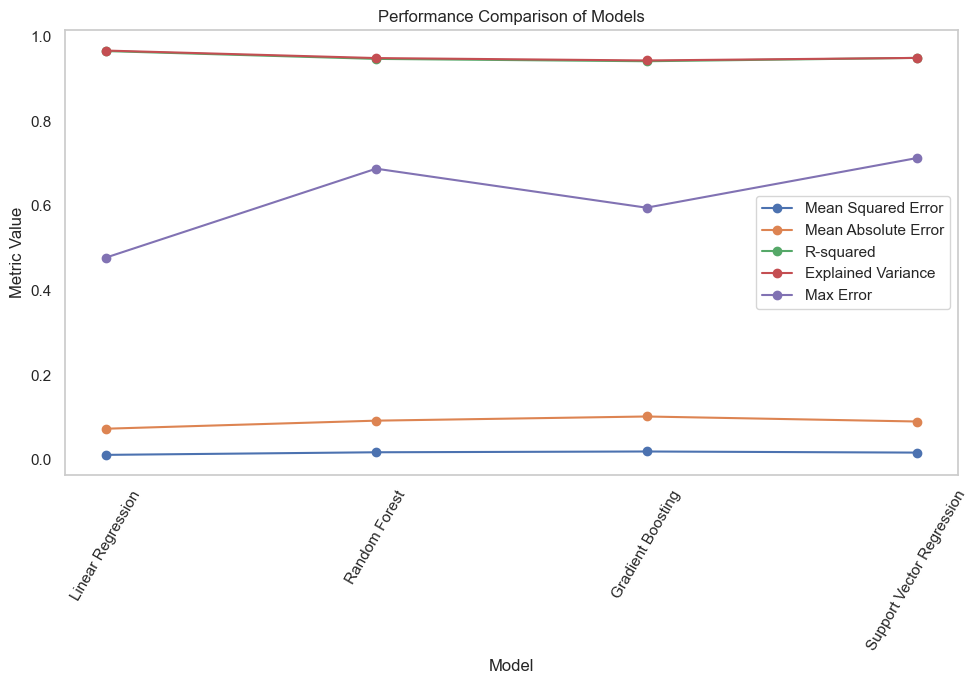

In [40]:
# Visualize the results
metrics = ["Mean Squared Error", "Mean Absolute Error", "R-squared", "Explained Variance", "Max Error"]
plt.figure(figsize=(10, 7))

for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Performance Comparison of Models")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.xticks(rotation=60)
plt.legend()
plt.grid(False)  # Remove the grid
plt.tight_layout()
plt.show()

### Cross Validation 

In [46]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Initialize evaluation metrics
metrics = {
    "Mean Squared Error": "neg_mean_squared_error",
    "Mean Absolute Error": "neg_mean_absolute_error",
    "R-squared": "r2",
    "Explained Variance": "explained_variance",
    "Max Error": "max_error"
}

# Initialize the number of folds (K)
k_folds = 5

# Define the cross-validation method (StratifiedKFold for classification)
cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

results = []

for model_name, model in models.items():
    for metric_name, metric_func in metrics.items():
        model_results = {"Model": model_name, "Metric": metric_name}
        
        # Perform cross-validation and specify the scoring metric
        scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring=metric_func)
        
        # Calculate the average score
        average_score = scores.mean()
        model_results["Average Score"] = average_score
        
        results.append(model_results)

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the results
results_df


Model               Metric  Average Score
0           Linear Regression   Mean Squared Error      -0.049273
1           Linear Regression  Mean Absolute Error      -0.111671
2           Linear Regression            R-squared       0.877568
3           Linear Regression   Explained Variance       0.879876
4           Linear Regression            Max Error      -1.415196
5               Random Forest   Mean Squared Error      -0.033286
6               Random Forest  Mean Absolute Error      -0.115172
7               Random Forest            R-squared       0.915809
8               Random Forest   Explained Variance       0.917589
9               Random Forest            Max Error      -0.966767
10          Gradient Boosting   Mean Squared Error      -0.030453
11          Gradient Boosting  Mean Absolute Error      -0.113165
12          Gradient Boosting            R-squared       0.922381
13          Gradient Boosting   Explained Variance       0.925695
14          Gradient Boosting            Max Error      -0.901688
15  Support Vector Regression   Mean Squared Error      -0.046792
16  Support Vector Regression  Mean Absolute Error      -0.114193
17  Support Vector Regression            R-squared       0.883745
18  Support Vector Regression   Explained Variance       0.885158
19  Support Vector Regression            Max Error      -1.368320

**Linear Regression:**

* **Mean Squared Error (MSE):** The average MSE across the five folds is approximately -0.049, indicating that the linear regression model has relatively low prediction errors on average.
* **Mean Absolute Error (MAE):** The average MAE is approximately -0.112, suggesting that the model's predictions are, on average, close to the true values.
* **R-squared (R²):** The average R² score is around 0.878, indicating that the linear regression model explains a substantial portion of the variance in the target variable.
* **Explained Variance:** The average explained variance is about 0.880, signifying that the model captures a significant portion of the target variable's variance.
* **Max Error:** The maximum error observed across the five folds is approximately -1.415.

**Random Forest:**

* **Mean Squared Error (MSE):** The average MSE is approximately -0.033, which is lower than that of the linear regression model. This suggests that the random forest model has smaller prediction errors on average.
* **Mean Absolute Error (MAE):** The average MAE is about -0.115, indicating that the model's predictions are generally close to the actual values.
* **R-squared (R²):** The average R² score is around 0.916, indicating that the random forest model explains a substantial portion of the variance in the target variable, even better than linear regression.
* **Explained Variance:** The average explained variance is approximately 0.918, signifying that the random forest model captures a significant portion of the target variable's variance.
* **Max Error:** The maximum error observed across the five folds is approximately -0.967.

**Gradient Boosting:**

* **Mean Squared Error (MSE):** The average MSE is approximately -0.030, which is lower than both linear regression and random forest models, indicating smaller prediction errors on average.
* **Mean Absolute Error (MAE):** The average MAE is approximately -0.113, suggesting that the model's predictions are close to the true values.
* **R-squared (R²):** The average R² score is around 0.922, indicating that the gradient boosting model explains a substantial portion of the variance in the target variable, performing the best among the models so far.
* **Explained Variance:** The average explained variance is approximately 0.926, signifying that the gradient boosting model captures a significant portion of the target variable's variance, also performing the best.
* **Max Error:** The maximum error observed across the five folds is approximately -0.902.

**Support Vector Regression (SVR):**

* **Mean Squared Error (MSE):** The average MSE is approximately -0.047, indicating relatively low prediction errors on average, but higher than the random forest and gradient boosting models.
* **Mean Absolute Error (MAE):** The average MAE is approximately -0.114, suggesting that the model's predictions are close to the true values.
* **R-squared (R²):** The average R² score is around 0.884, indicating that the SVR model explains a substantial portion of the variance in the target variable.
* **Explained Variance:** The average explained variance is approximately 0.885, signifying that the SVR model captures a significant portion of the target variable's variance.
* **Max Error:** The maximum error observed across the five folds is approximately -1.368.

In summary, the gradient boosting model appears to perform the best based on these cross-validation results, as it has the lowest MSE, highest R-squared and explained variance scores, and a relatively low maximum error. 

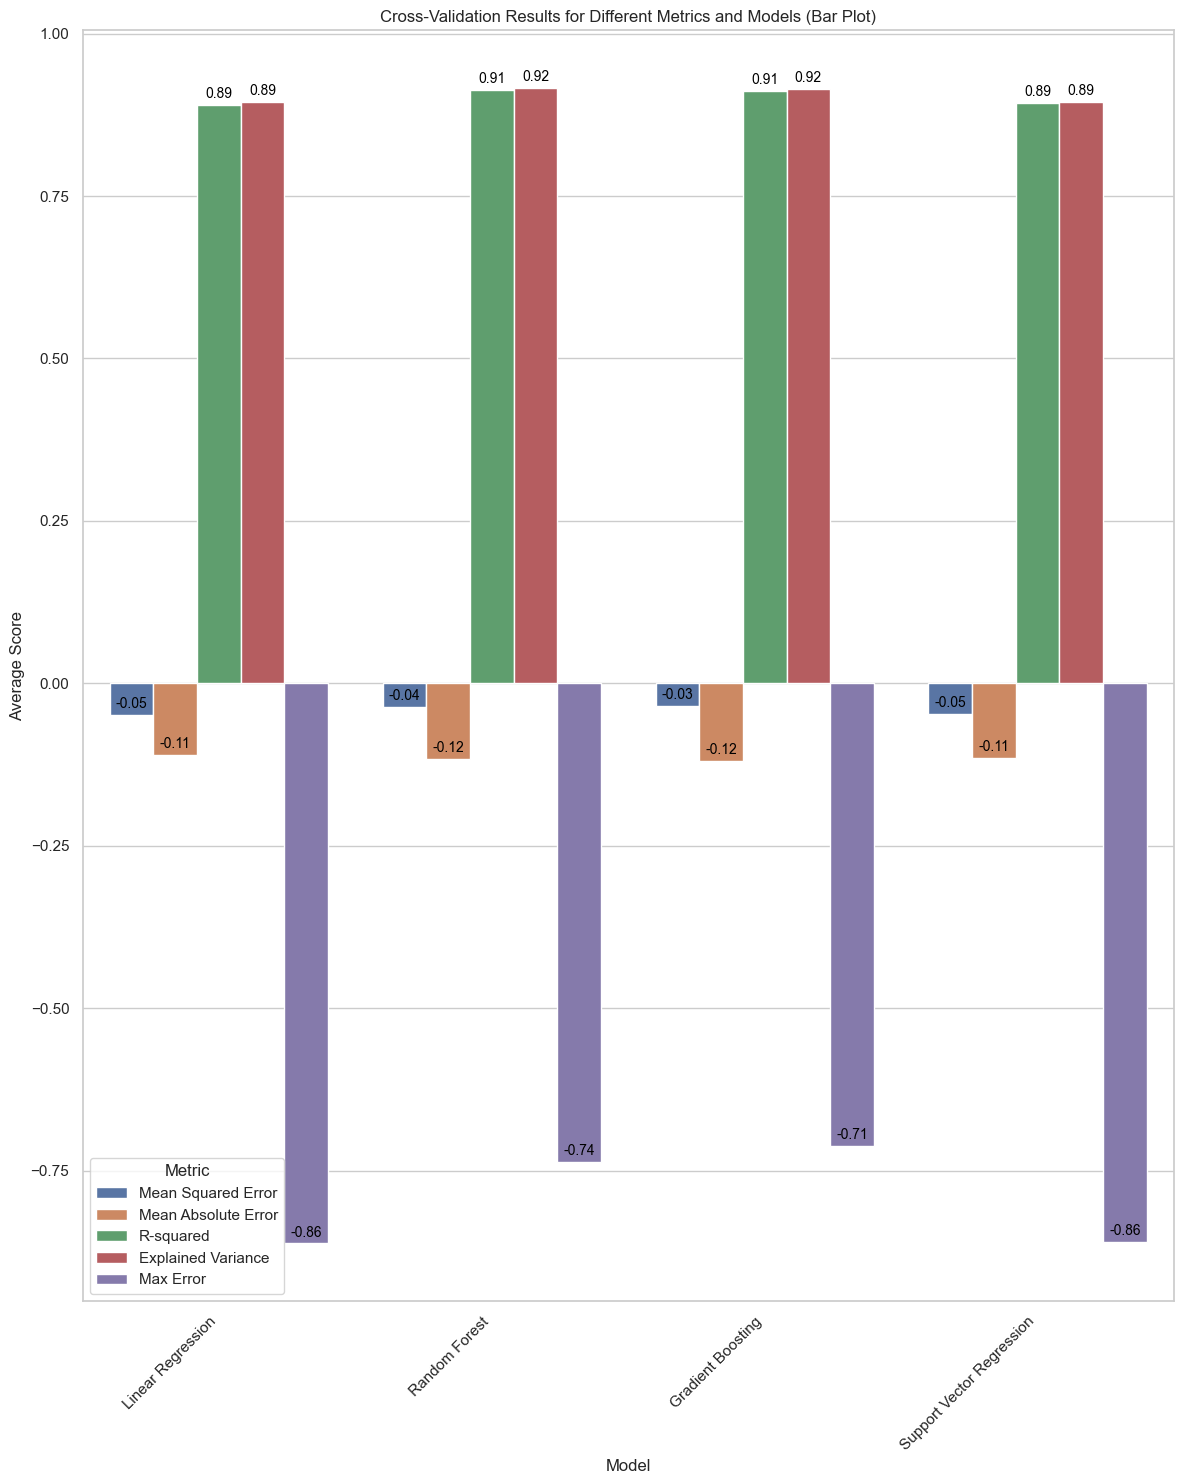

In [42]:
# Create a bar plot with Model on the x-axis
plt.figure(figsize=(12, 15))
ax = sns.barplot(x="Model", y="Average Score", hue="Metric", data=results_df)
plt.xticks(rotation=45, ha="right")
plt.title("Cross-Validation Results for Different Metrics and Models (Bar Plot)")

# Add data labels (annotations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

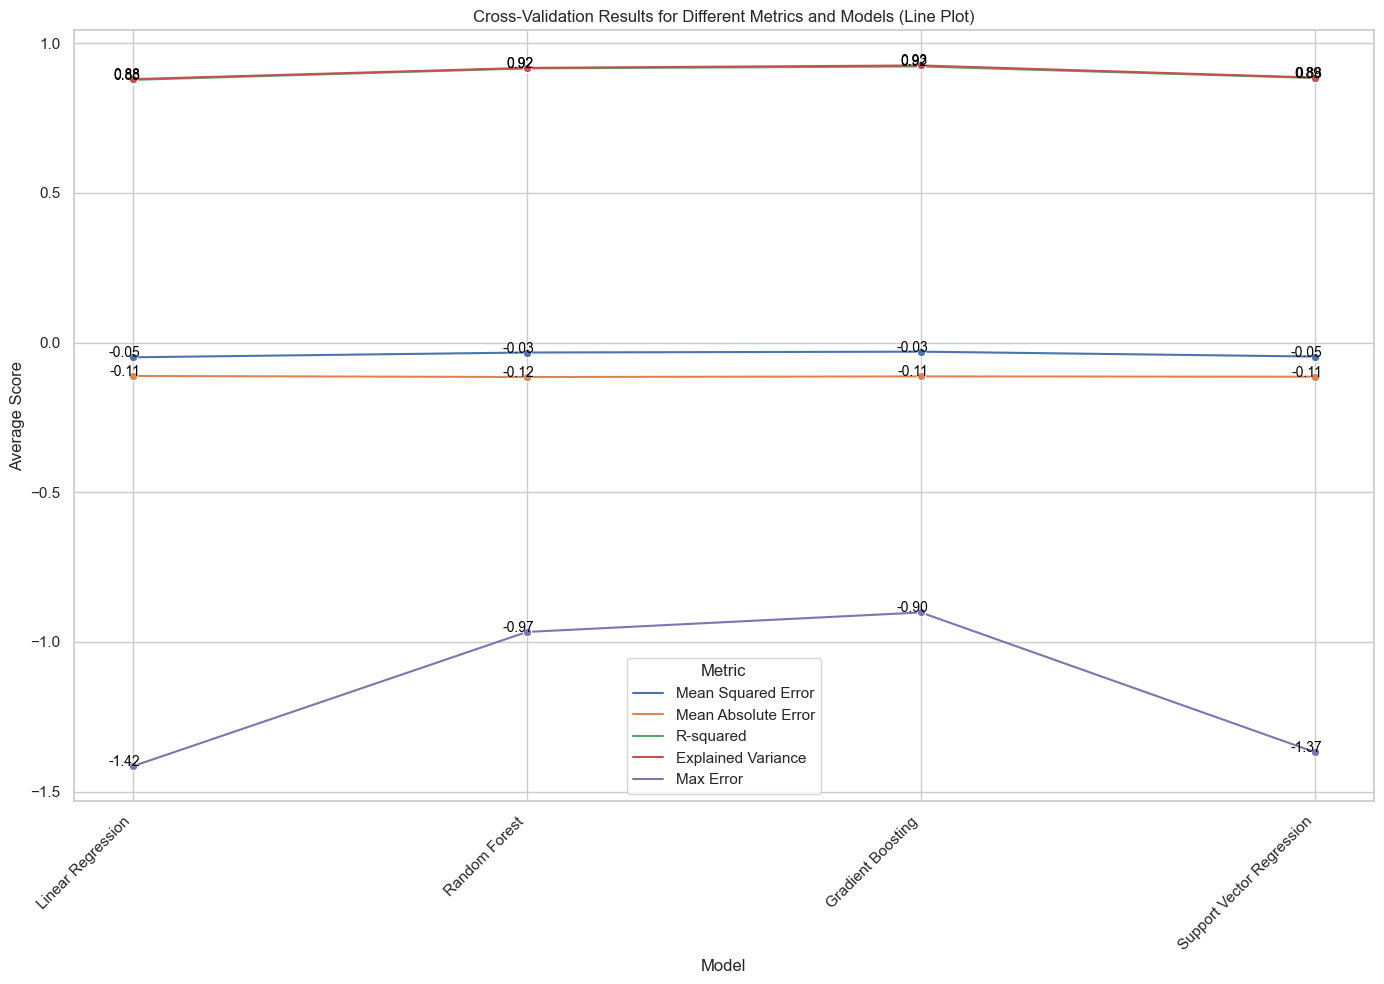

In [335]:
# Create a line plot with Model on the x-axis
plt.figure(figsize=(14, 10))
ax = sns.lineplot(x="Model", y="Average Score", hue="Metric", data=results_df, marker="o")
plt.xticks(rotation=45, ha="right")
plt.title("Cross-Validation Results for Different Metrics and Models (Line Plot)")

# Add data labels (annotations) to the data points
for line in ax.lines:
    xdata, ydata = line.get_xydata().T
    for x, y in zip(xdata, ydata):
        ax.annotate(f'{y:.2f}', (x, y), ha='right', fontsize=10, color='black', xytext=(5,0), textcoords='offset points')

plt.tight_layout()
plt.show()

# Experiment Prediction

In [54]:
# Choose the trained model for prediction (in your case, the Gradient Boosting Regressor)
chosen_model = GradientBoostingRegressor(random_state=42)

# Retrain the chosen model on the training data with selected features
chosen_model.fit(X_train_selected, y_train)  # Use X_train_selected, which contains only selected features

# Transform the test dataset using the same feature selector
X_test_selected = feature_selector.transform(X_test)  # Use your preprocessed test data with selected features

# Make predictions using the retrained model
predictions = chosen_model.predict(X_test_selected)

# Create a DataFrame to store the experiment predictions
experiment_results = pd.DataFrame({
    "True CGPA": y_test,            # True CGPA values from the test dataset
    "Predicted CGPA": predictions  # Predicted CGPA values from the model
})

# Display the experiment results
experiment_results


True CGPA  Predicted CGPA
509      1.992        2.215733
70       3.490        3.566392
131      2.823        2.633031
512      2.288        2.283577
542      3.816        3.813323
..         ...             ...
75       2.683        2.448066
250      3.328        3.453949
528      3.734        3.632169
268      3.473        3.418073
68       2.715        2.632509

[115 rows x 2 columns]

In [57]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Initialize evaluation metrics
metrics = {
    "Mean Squared Error": mean_squared_error,
    "Mean Absolute Error": mean_absolute_error,
    "R-squared": r2_score,
    "Explained Variance": explained_variance_score,
    "Max Error": max_error
}

# Initialize feature selector (if not done already)
num_features_to_select = 23  # Choose the number of features you want to select
feature_selector = SelectKBest(score_func=f_regression, k=num_features_to_select)

# Fit feature selector on training data
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Loop through each model
for model_name, model in models.items():
    # Choose the trained model for prediction
    chosen_model = model
    
    # Retrain the chosen model on the training data with selected features
    chosen_model.fit(X_train_selected, y_train)
    
    # Transform the test dataset using the same feature selector
    X_test_selected = feature_selector.transform(X_test)  # Use your preprocessed test data with selected features
    
    # Make predictions using the retrained model
    predictions = chosen_model.predict(X_test_selected)
    
    # Create a DataFrame to store the experiment predictions
    experiment_results = pd.DataFrame({
        "True CGPA": y_test,            # True CGPA values from the test dataset
        "Predicted CGPA": predictions  # Predicted CGPA values from the model
    })
    
    # Display the experiment results for each model
    print("\033[1m" + f"Experiment result based on {model_name}:" + "\033[0m")
    print(experiment_results)


Experiment result based on Linear Regression:
     True CGPA  Predicted CGPA
509      1.992        2.069761
70       3.490        3.469793
131      2.823        2.806538
512      2.288        2.277052
542      3.816        3.803934
..         ...             ...
75       2.683        2.715545
250      3.328        3.336385
528      3.734        3.736717
268      3.473        3.407324
68       2.715        2.661893

[115 rows x 2 columns]
Experiment result based on Random Forest:
     True CGPA  Predicted CGPA
509      1.992        2.225618
70       3.490        3.505440
131      2.823        2.629390
512      2.288        2.198530
542      3.816        3.840580
..         ...             ...
75       2.683        2.657900
250      3.328        3.391110
528      3.734        3.634570
268      3.473        3.418600
68       2.715        2.548600

[115 rows x 2 columns]
Experiment result based on Gradient Boosting:
     True CGPA  Predicted CGPA
509      1.992        2.215733
70       3.4

**Linear Regression:**

* The "True CGPA" and "Predicted CGPA" values are quite close for most data points. This suggests that the Linear Regression model does a good job of predicting CGPA.
* The model's predictions are generally accurate, as evidenced by the small differences between the true and predicted values.
* The Linear Regression model seems to capture the underlying patterns in the data well, as indicated by the close alignment between the two columns.

**Random Forest:**

* Similar to Linear Regression, the "True CGPA" and "Predicted CGPA" values are close for many data points. This indicates that the Random Forest model performs well in predicting CGPA.
* The model's predictions are accurate, with relatively small differences between the true and predicted values.
* Random Forest, being an ensemble model, leverages multiple decision trees to make predictions and shows competitive performance.

**Gradient Boosting:**

* The "True CGPA" and "Predicted CGPA" values in this model are also in close agreement for most data points. Gradient Boosting demonstrates a strong ability to predict CGPA.
* Predictions from the Gradient Boosting model are quite accurate, with minimal deviations from the true values.
* Gradient Boosting is known for its strong predictive power and appears to capture complex relationships in the data effectively.

**Support Vector Regression (SVR):**

* SVR's "True CGPA" and "Predicted CGPA" values are relatively close, but there are some instances where the predictions differ more from the true values compared to the other models.
* The SVR model still provides reasonably accurate predictions, but it might struggle with certain data points or patterns.
* SVR is a powerful algorithm for regression tasks, but its performance can be sensitive to hyperparameters and kernel choices. Fine-tuning may further improve its accuracy.